<h1 style="background-color:MediumTurquoise;border-radius:5px;text-align:center;padding:15px;color:white;">AI Technologies Assignment - Part 1</h1>
<h4>Done by: V Varsha (203011T)<br><br>Module Code: IT3312</h4>

## 1. Import Modules

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import seaborn as sns
import os
from PIL import Image, ImageChops
import cv2 
import numpy as np
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

## 2. Define Functions

In [2]:
#This function is used to unpickle the coloured cifar-10 images.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict #the function returns a dictionary

In [3]:
#This function is used to visualize the 21 images in the dataset  using matplot lib 
def visualize_images(images,class_name):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    fig.suptitle(("{} Images").format(class_name),fontsize=16)
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images.iloc[i].values.reshape(32,32),cmap="gray") 
    plt.show()

## 3. Read Files

### 3.1 Read Grayscale Images

In [216]:
#read the different batches of data
train_batch1 = pd.read_pickle("train_batch1.pkl")  
train_batch2 = pd.read_pickle("train_batch2.pkl")  
train_batch3 = pd.read_pickle("train_batch3.pkl")  
train_batch4 = pd.read_pickle("train_batch4.pkl")  
train_batch5 = pd.read_pickle("train_batch5.pkl")  
test_data = pd.read_pickle("test_batch1.pkl") 
#merge the training data into a single dataframe
train_data=pd.concat([train_batch1, train_batch2,train_batch3,train_batch4,train_batch5])
#merge the training data and test data into a single data frame for Exploratory Data Analysis
data=pd.concat([train_data,test_data])

In [90]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,61,45,48,57,78,96,113,117,123,126,...,96,103,94,72,83,145,189,124,99,6
1,171,134,103,101,130,164,187,195,152,116,...,46,66,91,115,130,134,137,138,137,9
2,255,253,253,253,253,253,253,253,253,253,...,79,76,65,62,68,76,83,83,84,9
3,24,33,34,37,39,36,37,22,26,31,...,65,81,67,75,75,58,47,56,65,4
4,179,177,185,192,194,192,194,193,193,193,...,84,81,78,79,75,74,78,74,76,1


<h4> 4.1 Exploratory Data Analysis - Shape </h4>
<p> Explore the shape of the train, test and overall dataset </p>

In [6]:
# read the shape of the training,test and entire dataset
print("CIFAR-10 Grayscale Dataset Shape:",data.shape)
print("CIFAR-10 Grayscale Train Dataset Shape:",train_data.shape)
print("CIFAR-10 Grayscale Test Dataset Shape:",test_data.shape)

CIFAR-10 Grayscale Dataset Shape: (60000, 1025)
CIFAR-10 Grayscale Train Dataset Shape: (50000, 1025)
CIFAR-10 Grayscale Test Dataset Shape: (10000, 1025)


#### 4.2 Exploratory Data Analysis - Info

In [16]:
print("CIFAR-10 Grayscale Dataset \n")
data.info()

CIFAR-10 Grayscale Dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 9999
Columns: 1025 entries, 0 to label
dtypes: uint8(1025)
memory usage: 59.1 MB


In [17]:
print("CIFAR-10 Grayscale Train Dataset \n")
train_data.info()

CIFAR-10 Grayscale Train Dataset 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Columns: 1025 entries, 0 to label
dtypes: uint8(1025)
memory usage: 49.3 MB


In [18]:
print("CIFAR-10 Grayscale Test Dataset \n")
test_data.info()

CIFAR-10 Grayscale Test Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1025 entries, 0 to label
dtypes: uint8(1025)
memory usage: 9.8 MB


#### 4.3 Exploratory Data Analysis - No. of images
<p> Explore the number of images in the train, test and overall dataset </p>

In [35]:
# print the number of images in the training,test and entire dataset
print("No. of images in CIFAR-10 Grayscale Dataset:",len(data))
print("No. of images in CIFAR-10 Grayscale Train Dataset:",len(train_data))
print("No. of images in CIFAR-10 Grayscale Test Dataset:",len(test_data))

No. of images in CIFAR-10 Grayscale Dataset: 60000
No. of images in CIFAR-10 Grayscale Train Dataset: 50000
No. of images in CIFAR-10 Grayscale Test Dataset: 10000


#### 4.3 Exploratory Data Analysis - Balance of Classes
<p> Use bar charts to understand the distribution of classes in the train, test and overall dataset </p>

[Text(0.5, 1.0, 'CIFAR-10 Grayscale Dataset')]

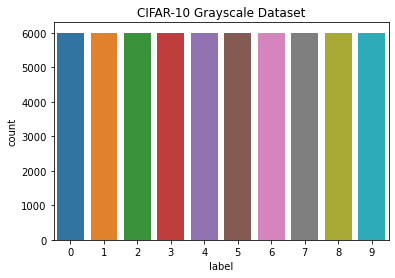

In [25]:
#balance of classes in overall dataset
sns.countplot(x ='label', data = data).set(title='CIFAR-10 Grayscale Dataset')

There are 6000 images in each class.

[Text(0.5, 1.0, 'CIFAR-10 Grayscale Train Dataset')]

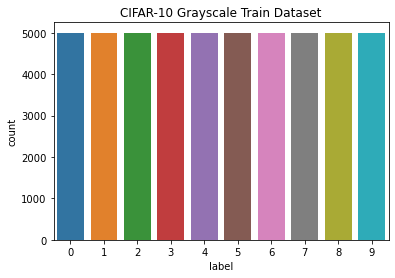

In [26]:
#balance of classes in training dataset
sns.countplot(x ='label', data = train_data).set(title='CIFAR-10 Grayscale Train Dataset')

There are 5000 images in each class.

[Text(0.5, 1.0, 'CIFAR-10 Grayscale Test Dataset')]

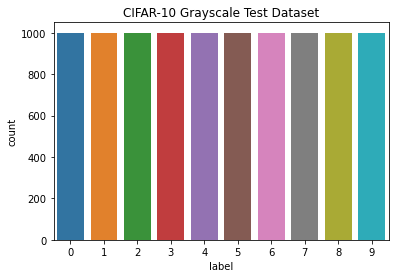

In [27]:
#balance of classes in test dataset
sns.countplot(x ='label', data = test_data).set(title='CIFAR-10 Grayscale Test Dataset')

There are 1000 images in each class.

#### 4.4 Exploratory Data Analysis - Class Analysis

<p> I performing the following for the exploration of image data in the various classes </p>
<ol>
    <li> Visualize Sample Images </li><br>
    <li> Histogram of Pixel Intensity of Images </li>
    <ul>
    <li>The X-axis represents the tonal scale (black at the left and white at the right), and Y-axis represents the number of pixels in an image. The histogram shows the number of pixels for each brightness level (intensity - from black to white), and when there are more pixels, the peak at the certain brightness level is higher. </li></ul><br>
    
    
<li> Explore a single image from each class</li>
    <ul>
        <li> Image Type </li>
        <li> Image Shape </li>
        <li> Image Width </li>
        <li> Image Height </li>
        <li> Image Dimension </li>
        <li> Image Size </li>
        <li> Image Maximum Pixel Value </li>
        <li> Image Minimum Pixel Value </li>
        <li> Image Data Type </li>
    </ul>
</ol>

#### 4.4 Exploratory Data Analysis - Class Analysis
<p> I performing the following for the exploration of image data in the various classes </p>
<p> 1. Visualize Sample Images <br>
2. Histogram of Pixel Intensity of Images <br>
 -   The X-axis represents the tonal scale (black at the left and white at the right), and Y-axis represents the number of pixels in an image. The histogram shows the number of pixels for each brightness level (intensity - from black to white), and when there are more pixels, the peak at the certain brightness level is higher.
3. Explore a single image from each class<br> </p>
   *  

**Histogram of Pixel Intensity**
<p> The X-axis represents the tonal scale (black at the left and white at the right), and Y-axis represents the number of pixels in an image. The histogram shows the number of pixels for each brightness level (intensity - from black to white), and when there are more pixels, the peak at the certain brightness level is higher. </p>

##### 4.4.1 Class - Airplane

In [67]:
# Retrieve dataset for airplane class
airplane_data=data.loc[data["label"]== 0].iloc[:,:-1]
print("Airplane Images Shape:",airplane_data.shape)

Airplane Images Shape: (6000, 1024)


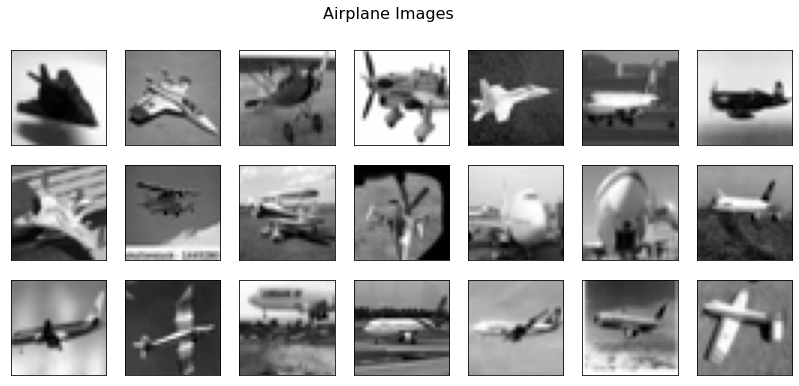

In [32]:
# Visualize some images in airplane class
visualize_images(airplane_data,"Airplane")

In [71]:
# Sample airplane image analysis 
airplane_img=airplane_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(airplane_img))
print('Shape of the image : {}'.format(airplane_img.shape))
print('Image Hight : {}'.format(airplane_img.shape[0]))
print('Image Width : {}'.format(airplane_img.shape[1]))
print('Dimension of Image : {}'.format(airplane_img.ndim))
print('Image size : {}'.format(airplane_img.size))
print('Maximum Pixel value in this image : {}'.format(airplane_img.max()))
print('Minimum Pixel value in this image : {}'.format(airplane_img.min()))
print('Image Dtype : {}'.format(airplane_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 254
Minimum Pixel value in this image : 3
Image Dtype : uint8


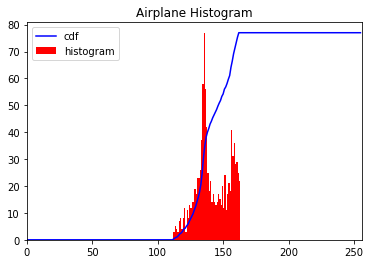

In [81]:
#histogram of the pixel intensity values for airplane class
airplane_data_avg=airplane_data.mean(axis=0)
hist_airplane,bins_airplane = np.histogram(airplane_data_avg,256,[0,256])
cdf_airplane = hist_airplane.cumsum()
cdf_normalized_airplane = cdf_airplane * float(hist_airplane.max()) / cdf_airplane.max()
plt.plot(cdf_normalized_airplane, color = 'b')
counts, edges, plot=plt.hist(airplane_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Airplane Histogram")
plt.show()

Based on the chart, the average pizel intensity of pixels is right skewed. The pixel intensity for this class is between 112 to 162 with the peaks between 130 to 140 and 151 to 162. This suggests that for the airplane class, the images are largely medium to high brightness

##### 4.4.2 Class - Automobile

In [74]:
# Retrieve dataset for automobile class
automobile_data=data.loc[data["label"]== 1].iloc[:,:-1]
print("Automobile Images Shape:",automobile_data.shape)

Automobile Images Shape: (6000, 1024)


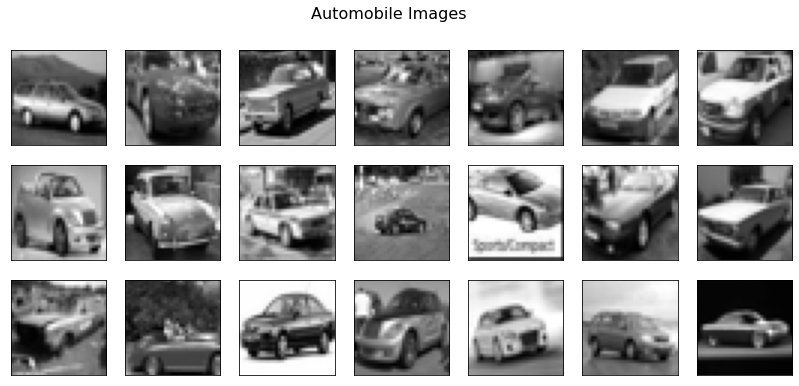

In [89]:
# Visualize some images in automobile class
visualize_images(automobile_data,"Automobile")

In [75]:
# Sample automoble image analysis 
automobile_img=automobile_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(automobile_img))
print('Shape of the image : {}'.format(automobile_img.shape))
print('Image Hight : {}'.format(automobile_img.shape[0]))
print('Image Width : {}'.format(automobile_img.shape[1]))
print('Dimension of Image : {}'.format(automobile_img.ndim))
print('Image size : {}'.format(automobile_img.size))
print('Maximum Pixel value in this image : {}'.format(automobile_img.max()))
print('Minimum Pixel value in this image : {}'.format(automobile_img.min()))
print('Image Dtype : {}'.format(automobile_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 250
Minimum Pixel value in this image : 1
Image Dtype : uint8


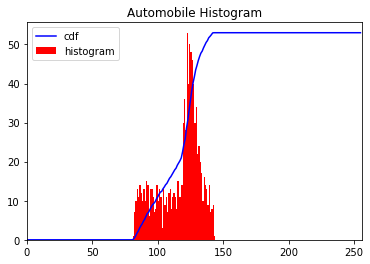

In [93]:
#histogram of the pixel intensity values for automobile class
automobile_data_avg=automobile_data.mean(axis=0)
hist_automobile,bins_automobile = np.histogram(automobile_data_avg,256,[0,256])
cdf_automobile = hist_automobile.cumsum()
cdf_normalized_automobile = cdf_automobile * float(hist_automobile.max()) / cdf_automobile.max()
plt.plot(cdf_normalized_automobile, color = 'b')
counts, edges, plot=plt.hist(automobile_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Automobile Histogram")
plt.show()

Based on the chart, average pixel intensity is left skewed. The pixel intensity is between 81 to 143 with the peak between 119 to 132. This suggests that for the automobile class, the images are largely low - medium brightness. 

##### 4.4.3 Class - Bird

In [8]:
# Retrieve dataset for bird class
bird_data=data.loc[data["label"]== 2].iloc[:,:-1]
print("Bird Images Shape:",bird_data.shape)

Bird Images Shape: (6000, 1024)


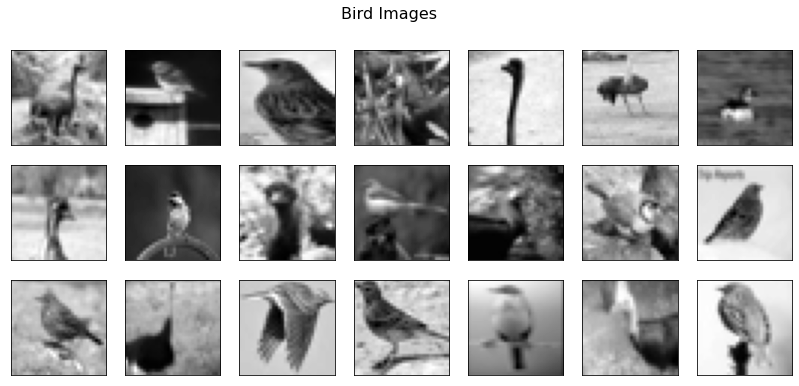

In [9]:
# Visualize some images in bird class
visualize_images(bird_data,"Bird")

In [76]:
# Sample bird image analysis 
bird_img=bird_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(bird_img))
print('Shape of the image : {}'.format(bird_img.shape))
print('Image Hight : {}'.format(bird_img.shape[0]))
print('Image Width : {}'.format(bird_img.shape[1]))
print('Dimension of Image : {}'.format(bird_img.ndim))
print('Image size : {}'.format(bird_img.size))
print('Maximum Pixel value in this image : {}'.format(bird_img.max()))
print('Minimum Pixel value in this image : {}'.format(bird_img.min()))
print('Image Dtype : {}'.format(bird_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 221
Minimum Pixel value in this image : 19
Image Dtype : uint8


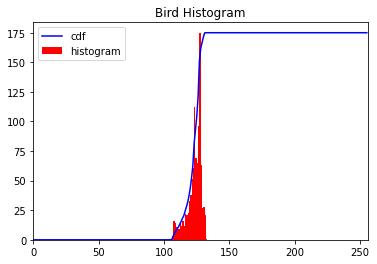

In [25]:
#histogram of the pixel intensity values for bird class
bird_data_avg=bird_data.mean(axis=0)
hist_bird,bins_bird = np.histogram(bird_data_avg,256,[0,256])
cdf_bird = hist_bird.cumsum()
cdf_normalized_bird = cdf_bird * float(hist_bird.max()) / cdf_bird.max()
plt.plot(cdf_normalized_bird, color = 'b')
counts, edges, plot = plt.hist(bird_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Bird Histogram")
plt.show()

Based on the chart, average pixel intensity is left skewed. The pixel intensity is between 106 to 132 with the peak between 121 to 128. This suggests that for the automobile class, the images are largely of low to medium brightness. 

##### 4.4.4 Class - Cat

In [13]:
# Retrieve dataset for cat class
cat_data=data.loc[data["label"]== 3].iloc[:,:-1]
print("Cat Images Shape:",cat_data.shape)

Cat Images Shape: (6000, 1024)


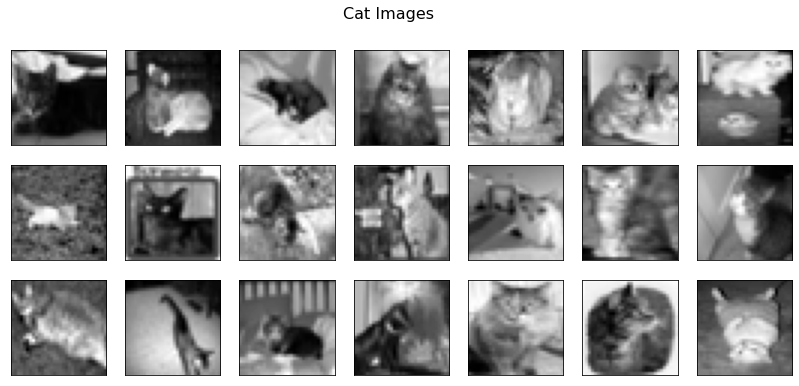

In [104]:
# Visualize some images in cat class
visualize_images(cat_data,"Cat")

In [77]:
# Sample cat image analysis 
cat_img=cat_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(cat_img))
print('Shape of the image : {}'.format(cat_img.shape))
print('Image Hight : {}'.format(cat_img.shape[0]))
print('Image Width : {}'.format(cat_img.shape[1]))
print('Dimension of Image : {}'.format(cat_img.ndim))
print('Image size : {}'.format(cat_img.size))
print('Maximum Pixel value in this image : {}'.format(cat_img.max()))
print('Minimum Pixel value in this image : {}'.format(cat_img.min()))
print('Image Dtype : {}'.format(cat_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 212
Minimum Pixel value in this image : 17
Image Dtype : uint8


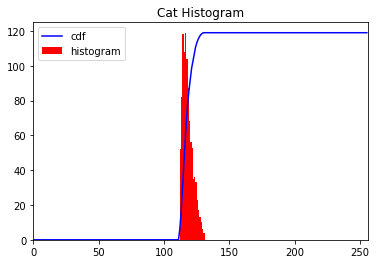

In [27]:
#histogram of the pixel intensity values for cat class
cat_data_avg=cat_data.mean(axis=0)
hist_cat,bins_cat = np.histogram(cat_data_avg,256,[0,256])
cdf_cat = hist_cat.cumsum()
cdf_normalized_cat = cdf_cat * float(hist_cat.max()) / cdf_cat.max()
plt.plot(cdf_normalized_cat, color = 'b')
counts, edges, plot = plt.hist(cat_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Cat Histogram")
plt.show()

Based on the chart, average pixel intensity is right skewed. The pixel intensity is between 112 to 130 with the peak between 113 to 118. This suggests that for the automobile class, the images are largely of low to medium brightness. 

##### 4.4.5 Class - Deer

In [17]:
# Retrieve dataset for deer class
deer_data=data.loc[data["label"]== 4].iloc[:,:-1]
print("Deer Images Shape:",deer_data.shape)

Deer Images Shape: (6000, 1024)


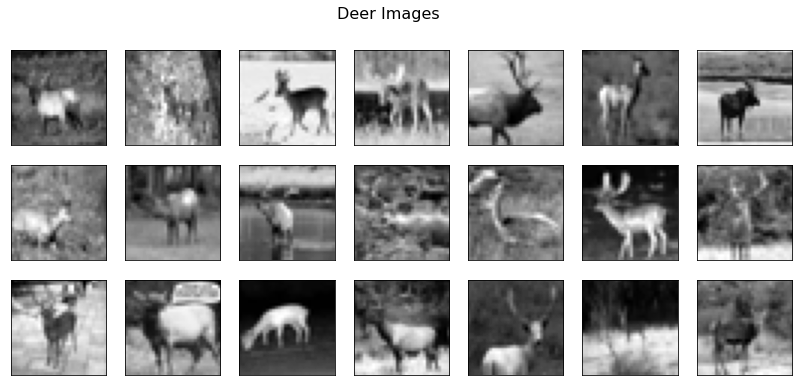

In [105]:
# Visualize some images in deer class
visualize_images(deer_data,"Deer")

In [78]:
# Sample deer image analysis 
deer_img=deer_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(deer_img))
print('Shape of the image : {}'.format(deer_img.shape))
print('Image Hight : {}'.format(deer_img.shape[0]))
print('Image Width : {}'.format(deer_img.shape[1]))
print('Dimension of Image : {}'.format(deer_img.ndim))
print('Image size : {}'.format(deer_img.size))
print('Maximum Pixel value in this image : {}'.format(deer_img.max()))
print('Minimum Pixel value in this image : {}'.format(deer_img.min()))
print('Image Dtype : {}'.format(deer_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 208
Minimum Pixel value in this image : 13
Image Dtype : uint8


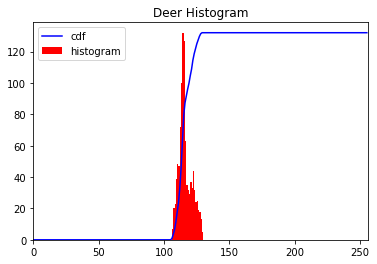

In [34]:
#histogram of the pixel intensity values for deer class
deer_data_avg=deer_data.mean(axis=0)
hist_deer,bins_deer = np.histogram(deer_data_avg,256,[0,256])
cdf_deer = hist_deer.cumsum()
cdf_normalized_deer = cdf_deer * float(hist_deer.max()) / cdf_deer.max()
plt.plot(cdf_normalized_deer, color = 'b')
counts, edges, plot =plt.hist(deer_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Deer Histogram")
plt.show()

Based on the chart, average pixel intensity is right skewed. The pixel intensity is between 106 to 129 with the peak between 112 to 116. This suggests that for the automobile class, the images are largely of low to medium brightness. 

##### 4.4.6 Class - Dog

In [36]:
# Retrieve dataset for dog class
dog_data=data.loc[data["label"]== 5].iloc[:,:-1]
print("Dog Images Shape:",dog_data.shape)

Dog Images Shape: (6000, 1024)


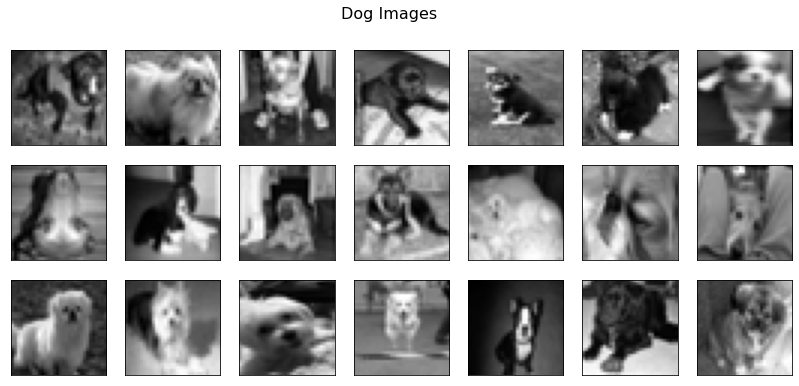

In [37]:
# Visualize some images in dog class
visualize_images(dog_data,"Dog")

In [79]:
# Sample dog image analysis 
dog_img=dog_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(dog_img))
print('Shape of the image : {}'.format(dog_img.shape))
print('Image Hight : {}'.format(dog_img.shape[0]))
print('Image Width : {}'.format(dog_img.shape[1]))
print('Dimension of Image : {}'.format(dog_img.ndim))
print('Image size : {}'.format(dog_img.size))
print('Maximum Pixel value in this image : {}'.format(dog_img.max()))
print('Minimum Pixel value in this image : {}'.format(dog_img.min()))
print('Image Dtype : {}'.format(dog_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 217
Minimum Pixel value in this image : 0
Image Dtype : uint8


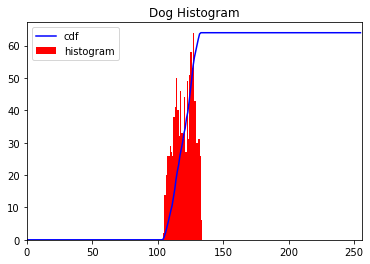

In [38]:
#histogram of the pixel intensity values for dog class
dog_data_avg=dog_data.mean(axis=0)
hist_dog,bins_dog = np.histogram(dog_data_avg,256,[0,256])
cdf_dog = hist_dog.cumsum()
cdf_normalized_dog = cdf_dog * float(hist_dog.max()) / cdf_dog.max()
plt.plot(cdf_normalized_dog, color = 'b')
counts, edges, plot =plt.hist(dog_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Dog Histogram")
plt.show()

Based on the chart, average pixel intensity is left skewed. The pixel intensity is between 104 to 133 with the peak between 113 to 117 and 124 to 128. This suggests that for the automobile class, the images are largely of low to medium brightness. 

##### 4.4.7 Class - Frog

In [41]:
# Retrieve dataset for frog class
frog_data=data.loc[data["label"]== 6].iloc[:,:-1]
print("Frog Images Shape:",frog_data.shape)

Frog Images Shape: (6000, 1024)


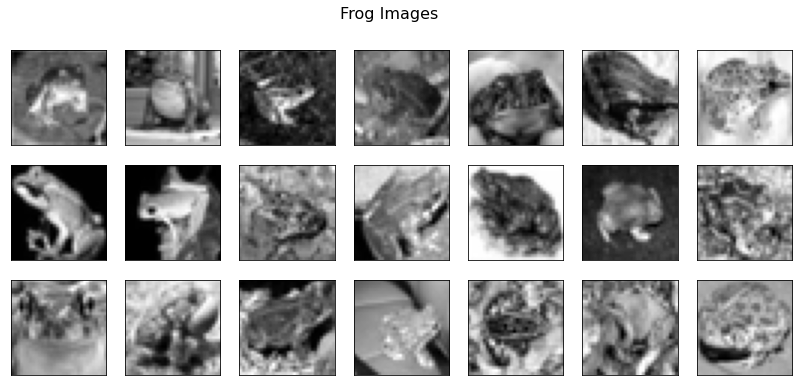

In [42]:
# Visualize some images in frog class
visualize_images(frog_data,"Frog")

In [80]:
# Sample frog image analysis 
frog_img=frog_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(frog_img))
print('Shape of the image : {}'.format(frog_img.shape))
print('Image Hight : {}'.format(frog_img.shape[0]))
print('Image Width : {}'.format(frog_img.shape[1]))
print('Dimension of Image : {}'.format(frog_img.ndim))
print('Image size : {}'.format(frog_img.size))
print('Maximum Pixel value in this image : {}'.format(frog_img.max()))
print('Minimum Pixel value in this image : {}'.format(frog_img.min()))
print('Image Dtype : {}'.format(frog_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 251
Minimum Pixel value in this image : 0
Image Dtype : uint8


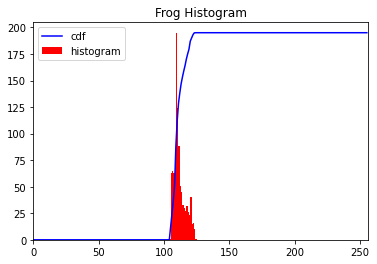

In [44]:
#histogram of the pixel intensity values for frog class
frog_data_avg=frog_data.mean(axis=0)
hist_frog,bins_frog = np.histogram(frog_data_avg,256,[0,256])
cdf_frog = hist_frog.cumsum()
cdf_normalized_frog = cdf_frog * float(hist_frog.max()) / cdf_frog.max()
plt.plot(cdf_normalized_frog, color = 'b')
counts, edges, plot =plt.hist(frog_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Frog Histogram")
plt.show()

Based on the chart, average pixel intensity is right skewed. The pixel intensity is between 104 to 124 with the peak between 108 to 111. This suggests that for the automobile class, the images are largely of low to medium brightness. 

##### 4.4.8 Class - Horse

In [47]:
# Retrieve dataset for horse class
horse_data=data.loc[data["label"]== 7].iloc[:,:-1]
print("Horse Images Shape:",horse_data.shape)

Horse Images Shape: (6000, 1024)


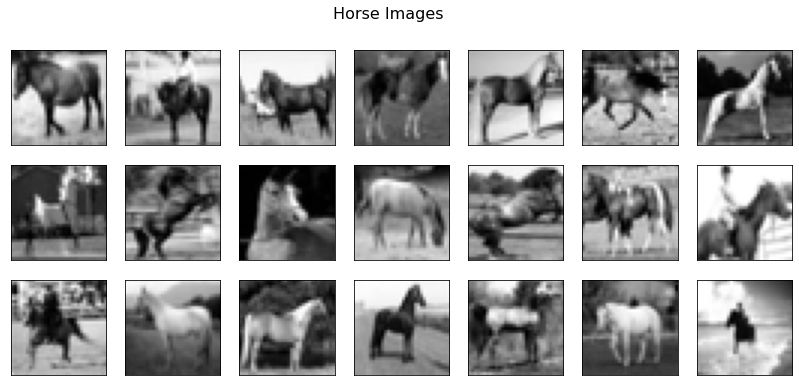

In [49]:
# Visualize some images in horse class
visualize_images(horse_data,"Horse")

In [81]:
# Sample horse image analysis 
horse_img=horse_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(horse_img))
print('Shape of the image : {}'.format(horse_img.shape))
print('Image Hight : {}'.format(horse_img.shape[0]))
print('Image Width : {}'.format(horse_img.shape[1]))
print('Dimension of Image : {}'.format(horse_img.ndim))
print('Image size : {}'.format(horse_img.size))
print('Maximum Pixel value in this image : {}'.format(horse_img.max()))
print('Minimum Pixel value in this image : {}'.format(horse_img.min()))
print('Image Dtype : {}'.format(horse_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 235
Minimum Pixel value in this image : 14
Image Dtype : uint8


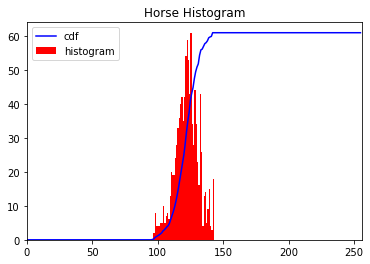

In [52]:
#histogram of the pixel intensity values for horse class
horse_data_avg=horse_data.mean(axis=0)
hist_horse,bins_horse = np.histogram(horse_data_avg,256,[0,256])
cdf_horse = hist_horse.cumsum()
cdf_normalized_horse = cdf_horse* float(hist_horse.max()) / cdf_horse.max()
plt.plot(cdf_normalized_horse, color = 'b')
counts, edges, plot =plt.hist(horse_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Horse Histogram")
plt.show()

Based on the chart, average pixel intensity is left skewed. The pixel intensity is between 96 to 142 with the peak between 120 to 125. This suggests that for the automobile class, the images are largely of low to medium brightness. 

##### 4.4.9 Class - Ship

In [55]:
# Retrieve dataset ship class
ship_data=data.loc[data["label"]== 8].iloc[:,:-1]
print("Ship Images Shape:",ship_data.shape)

Ship Images Shape: (6000, 1024)


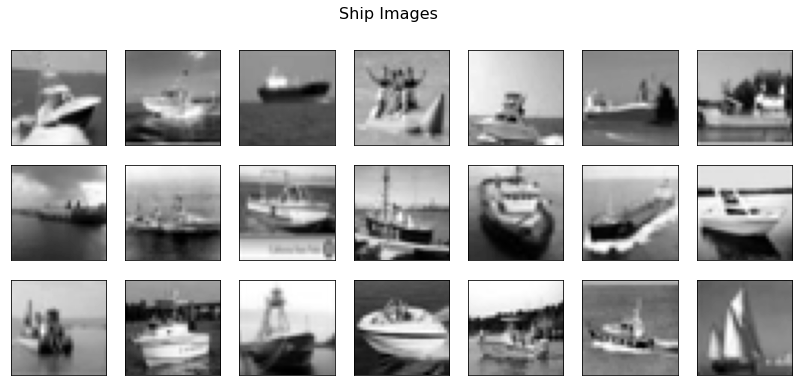

In [56]:
# Visualize some images in ship class
visualize_images(ship_data,"Ship")

In [82]:
# Sample ship image analysis 
ship_img=ship_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(ship_img))
print('Shape of the image : {}'.format(ship_img.shape))
print('Image Hight : {}'.format(ship_img.shape[0]))
print('Image Width : {}'.format(ship_img.shape[1]))
print('Dimension of Image : {}'.format(ship_img.ndim))
print('Image size : {}'.format(ship_img.size))
print('Maximum Pixel value in this image : {}'.format(ship_img.max()))
print('Minimum Pixel value in this image : {}'.format(ship_img.min()))
print('Image Dtype : {}'.format(ship_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 246
Minimum Pixel value in this image : 19
Image Dtype : uint8


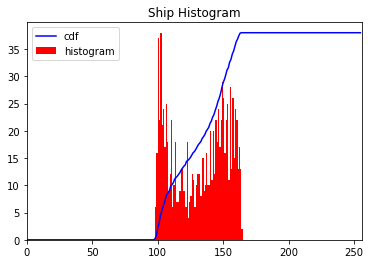

In [62]:
#histogram of the pixel intensity values for ship class
ship_data_avg=ship_data.mean(axis=0)
hist_ship,bins_ship = np.histogram(ship_data_avg,256,[0,256])
cdf_ship = hist_ship.cumsum()
cdf_normalized_ship = cdf_ship* float(hist_ship.max()) / cdf_ship.max()
plt.plot(cdf_normalized_ship, color = 'b')
counts, edges, plot = plt.hist(ship_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Ship Histogram")
plt.show()

Based on the chart, average pixel intensity is right skewed. The pixel intensity is between 98 to 164 with the peak between 100 to 102,148 to 152 and 157 to 159. This suggests that for the automobile class, the images are largely of medium to high brightness. 

##### 4.4.10 Class - Truck

In [60]:
# Retrieve dataset for Truck class
truck_data=data.loc[data["label"]== 9].iloc[:,:-1]
print("Truck Images Shape:",truck_data.shape)

Truck Images Shape: (6000, 1024)


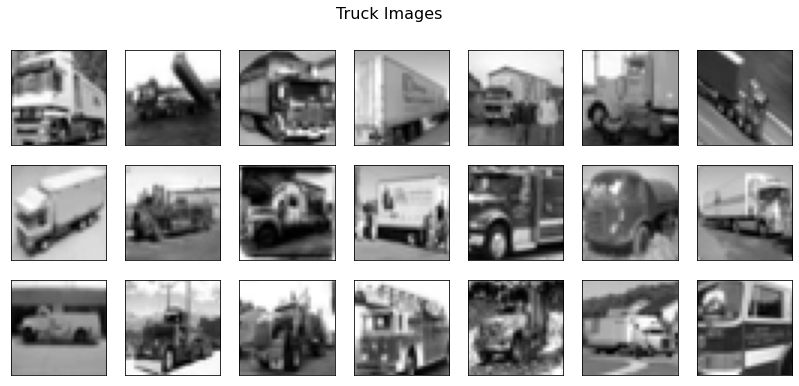

In [61]:
# Visualize some images in truck class
visualize_images(truck_data,"Truck")

In [83]:
# Sample truck image analysis 
truck_img=truck_data.values.reshape(6000,32,32,1)[0]
print('Type of the image : ',type(truck_img))
print('Shape of the image : {}'.format(truck_img.shape))
print('Image Hight : {}'.format(truck_img.shape[0]))
print('Image Width : {}'.format(truck_img.shape[1]))
print('Dimension of Image : {}'.format(truck_img.ndim))
print('Image size : {}'.format(ship_img.size))
print('Maximum Pixel value in this image : {}'.format(truck_img.max()))
print('Minimum Pixel value in this image : {}'.format(truck_img.min()))
print('Image Dtype : {}'.format(truck_img.dtype))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (32, 32, 1)
Image Hight : 32
Image Width : 32
Dimension of Image : 3
Image size : 1024
Maximum Pixel value in this image : 253
Minimum Pixel value in this image : 6
Image Dtype : uint8


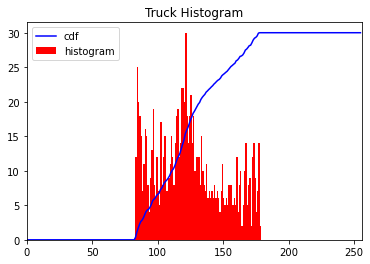

In [63]:
#histogram of the pixel intensity values for truck class
truck_data_avg=truck_data.mean(axis=0)
hist_truck,bins_truck = np.histogram(truck_data_avg,256,[0,256])
cdf_truck = hist_truck.cumsum()
cdf_normalized_truck = cdf_truck* float(hist_truck.max()) / cdf_truck.max()
plt.plot(cdf_normalized_truck, color = 'b')
counts, edges, plot = plt.hist(truck_data_avg,256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Truck Histogram")
plt.show()

Based on the chart, average pixel intensity is right skewed. The pixel intensity is between 83 to 178 with the peak between 118 to 121 and 84 to 86. This suggests that for the automobile class, the images ranges between low to high brightness. 

## 5. Data Normalization

In [92]:
labels = data["label"]
data = data.iloc[:,:-1]/255
data["label"]=labels

In [94]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.239216,0.176471,0.188235,0.223529,0.305882,0.376471,0.443137,0.458824,0.482353,0.494118,...,0.376471,0.403922,0.368627,0.282353,0.325490,0.568627,0.741176,0.486275,0.388235,6
1,0.670588,0.525490,0.403922,0.396078,0.509804,0.643137,0.733333,0.764706,0.596078,0.454902,...,0.180392,0.258824,0.356863,0.450980,0.509804,0.525490,0.537255,0.541176,0.537255,9
2,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.309804,0.298039,0.254902,0.243137,0.266667,0.298039,0.325490,0.325490,0.329412,9
3,0.094118,0.129412,0.133333,0.145098,0.152941,0.141176,0.145098,0.086275,0.101961,0.121569,...,0.254902,0.317647,0.262745,0.294118,0.294118,0.227451,0.184314,0.219608,0.254902,4
4,0.701961,0.694118,0.725490,0.752941,0.760784,0.752941,0.760784,0.756863,0.756863,0.756863,...,0.329412,0.317647,0.305882,0.309804,0.294118,0.290196,0.305882,0.290196,0.298039,1


## 6. Read Coloured CFIAR - 10 Dataset

In [97]:
#open and extract contents from tar file
tar = tarfile.open('cifar-10-python.tar.gz', "r:gz")
tar.extractall()
tar.close()

In [193]:
# read colored data using unpickle function
colored_train_batch1=unpickle("cifar-10-batches-py/data_batch_1")
colored_train_batch2=unpickle("cifar-10-batches-py/data_batch_2")
colored_train_batch3=unpickle("cifar-10-batches-py/data_batch_3")
colored_train_batch4=unpickle("cifar-10-batches-py/data_batch_4")
colored_train_batch5=unpickle("cifar-10-batches-py/data_batch_5")
colored_test_batch=unpickle("cifar-10-batches-py/test_batch")

## 7. Understand Data Structure of Coloured CFIAR - 10 Dataset

In [194]:
# Get data type of dataset
print("Coloured CIFAR - 10 Dataset Type:",type(colored_train_batch1))

Coloured CIFAR - 10 Dataset Type: <class 'dict'>


In [103]:
# Since the data type is a dictionary, retrieve the keys in the dictionary
colored_train_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [128]:
#Understand data type of each dictionary keys
print("Coloured CIFAR - 10 Dataset 'batch_labels' Data Type:",type(colored_train_batch1[b'batch_label']))
print("Coloured CIFAR - 10 Dataset 'labels' Data Type:",type(colored_train_batch1[b'labels']))
print("Coloured CIFAR - 10 Dataset 'data' Data Type:",type(colored_train_batch1[b'data']))
print("Coloured CIFAR - 10 Dataset 'filenames' Data Type:",type(colored_train_batch1[b'filenames']))

Coloured CIFAR - 10 Dataset 'batch_labels' Data Type: <class 'bytes'>
Coloured CIFAR - 10 Dataset 'labels' Data Type: <class 'list'>
Coloured CIFAR - 10 Dataset 'data' Data Type: <class 'numpy.ndarray'>
Coloured CIFAR - 10 Dataset 'filenames' Data Type: <class 'list'>


In [151]:
#Understand length of each dictionary keys
print("Coloured CIFAR - 10 Dataset 'batch_labels' Data Type:",len(colored_train_batch1[b'batch_label']))
print("Coloured CIFAR - 10 Dataset 'labels' Data Type:",len(colored_train_batch1[b'labels']))
print("Coloured CIFAR - 10 Dataset 'data' Data Type:",len(colored_train_batch1[b'data']))
print("Coloured CIFAR - 10 Dataset 'filenames' Data Type:",len(colored_train_batch1[b'filenames']))

Coloured CIFAR - 10 Dataset 'batch_labels' Data Type: 21
Coloured CIFAR - 10 Dataset 'labels' Data Type: 10000
Coloured CIFAR - 10 Dataset 'data' Data Type: 10000
Coloured CIFAR - 10 Dataset 'filenames' Data Type: 10000


In [117]:
# print unique batch label values
batch_labels = set(colored_train_batch1[b'batch_label'])
print("Coloured CIFAR - 10 Dataset 'batch_labels' column unique values:", batch_labels)

Coloured CIFAR - 10 Dataset 'batch_labels' column unique values: {32, 97, 98, 99, 102, 103, 104, 105, 110, 111, 49, 114, 116, 53}


In [114]:
# print unique label values
# Similar to the grayscale dataset there are 10 classes with the labels ranging from 0 - 9
labels = set(colored_train_batch1[b'labels'])
print("Coloured CIFAR - 10 Dataset 'label' column unique values:", labels)

Coloured CIFAR - 10 Dataset 'label' column unique values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [129]:
print("Coloured CIFAR - 10 Dataset 'data' array shape:",colored_train_batch1[b'data'].shape)

Coloured CIFAR - 10 Dataset 'data' Data Type: (10000, 3072)


The dimensions of the cirfar - 10  images are 32x32. Since the coloured images has 3 RGB channels, the length of the coloured image is 3072.Hence, the dataset needs to be shaped to (32,32,3)

In [145]:
#print data type of 'data'
print("Coloured CIFAR - 10 Dataset 'data' data type:",colored_train_batch1[b'data'].dtype)

Coloured CIFAR - 10 Dataset 'data' data type: uint8


In [195]:
colored_train_batch1[b'data']

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

This dataset is a dictionary which consists of 4 keys, "batch_label","labels", "data" and "filename" <br>
The "label" keys' values is a list of the labels for each image ranging from 0 - 9 which are the classes the image belongs to <br>
The "data" keys' values is a numpy array of the pixels in the images. <br>
The "filename" keys' values is a list of the file names of the images and the "batch_labels" are bytes. However, both are unecessary for the conversion and classification to be performed later.

## 8. Coloured CFIAR - 10 Dataset  Data Preparation

In [202]:
#Retreive first 50 images used for conversion
coloured_data_50=colored_train_batch1[b'data'][0:50]
print("Number of coloured images:",len(coloured_data_50))

Number of coloured images: 50


In [160]:
# Reshape and Transpose to obtain the right shape
coloured_data_50=coloured_data_50.reshape(50,3,32,32).transpose(0,2,3,1).astype("uint8")
print("First 50 Coloured CIFAR-10 Images Shape:",coloured_data_50.shape)

First 50 Coloured CIFAR-10 Images Shape: (50, 32, 32, 3)


In [164]:
print("First 50 Coloured CIFAR-10 Images Shape:",coloured_data_50.shape)
print("Coloured CIFAR-10 Image Height:",coloured_data_50.shape[1])
print("Coloured CIFAR-10 Image Width:",coloured_data_50.shape[2])
print("Coloured CIFAR-10 RGB Channels:",coloured_data_50.shape[3])
print("Coloured CIFAR-10 Image Dimensions:",coloured_data_50.ndim)

First 50 Coloured CIFAR-10 Images Shape: (50, 32, 32, 3)
Coloured CIFAR-10 Image Height: 32
Coloured CIFAR-10 Image Width: 32
Coloured CIFAR-10 RGB Channels: 3
Coloured CIFAR-10 Image Dimensions: 4


In [212]:
#save first 50 coloured cifar-10 images 
if not os.path.exists("cifar-10-colored-first-50"): #create directory, if directory does not exist
    os.makedirs('cifar-10-colored-first-50')

for i in range(50):
    plt.imshow(colored_pics[i])
    plt.savefig("cifar-10-colored-first-50/{0}.png".format(i)) #save images
    plt.close()    

## 9. Converted First 50 Coloured CFIAR - 10 Images to Black & White

In [213]:
if not os.path.exists("cifar-10-grayscale-converted-first-50"): #create directory, if directory does not exist
    os.makedirs('cifar-10-grayscale-converted-first-50')

for i in range(50):
    img = Image.open('cifar-10-colored-first-50/{0}.png'.format(i)) #read image
    imgGray = img.convert('L') #convert coloured image to black and white
    imgGray.save('cifar-10-grayscale-converted-first-50/{0}.png'.format(i)) 

## 10. Save first 50 black & white CIFAR - 10 Images
This will be used for the comparison of images in the next step

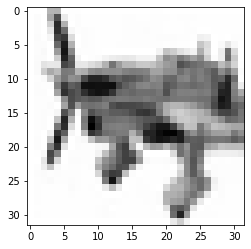

In [220]:
if not os.path.exists("cifar-10-grayscale-original-first-50"):  #create directory, if directory does not exist
    os.makedirs('cifar-10-grayscale-original-first-50')
for i in range(50):
    plt.imshow(train_batch1.iloc[i,:-1].values.reshape(32,32),cmap="gray")
    plt.savefig('cifar-10-grayscale-original-first-50/{0}.png'.format(i)) #Save image to directory

## 11. Verify the Converted Black & White Images are Identical to the Orignal Image

Use Image Chops "difference" function in the PIL module to get the difference between the original grayscale and converted grayscale images

Orignial Image 0


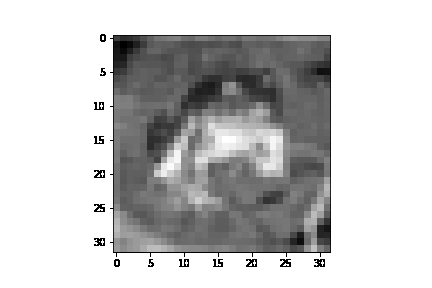

Converted Image 0


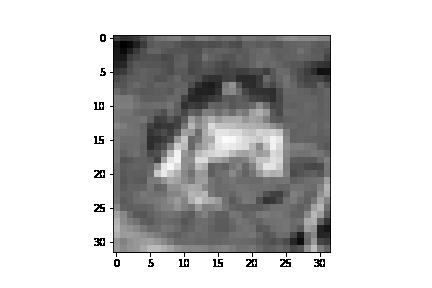

Difference in Images 0


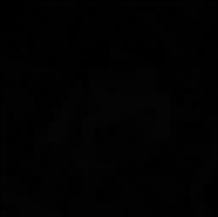

Orignial Image 1


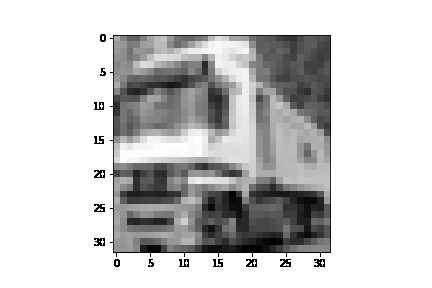

Converted Image 1


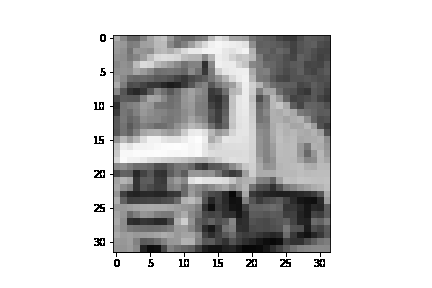

Difference in Images 1


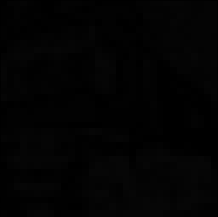

Orignial Image 2


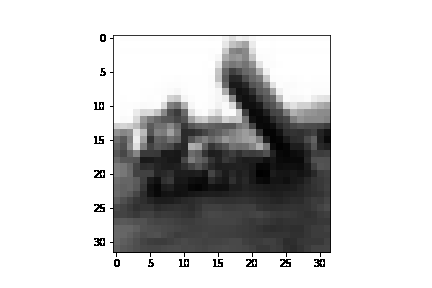

Converted Image 2


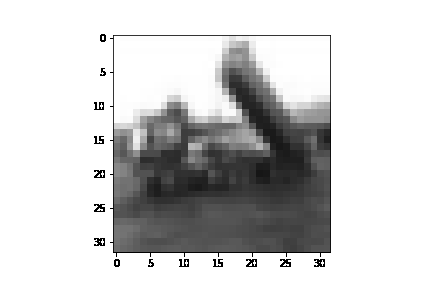

Difference in Images 2


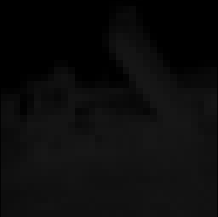

Orignial Image 3


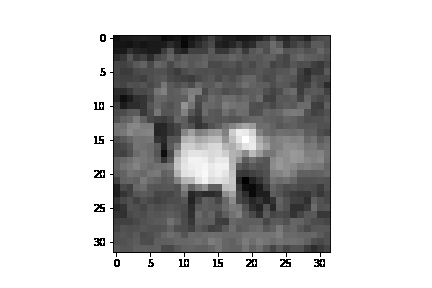

Converted Image 3


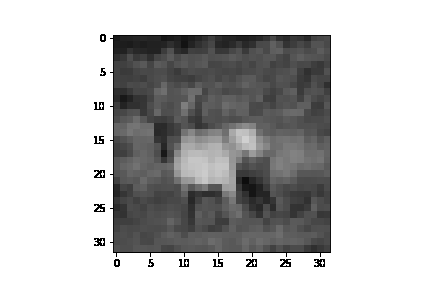

Difference in Images 3


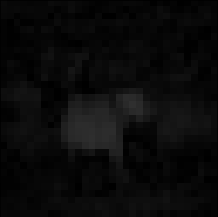

Orignial Image 4


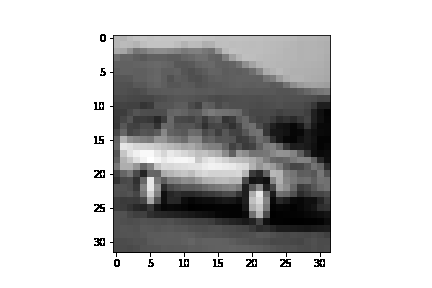

Converted Image 4


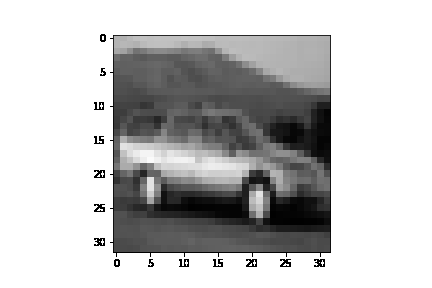

Difference in Images 4


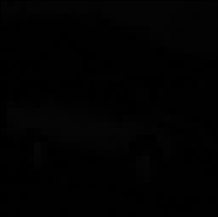

Orignial Image 5


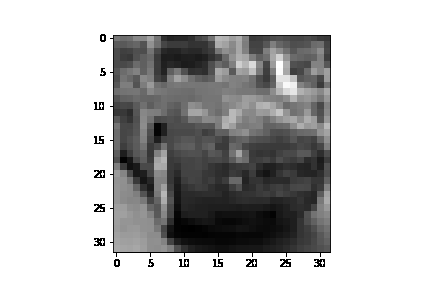

Converted Image 5


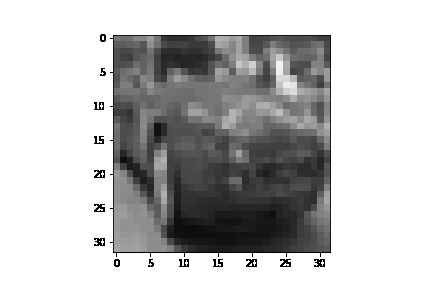

Difference in Images 5


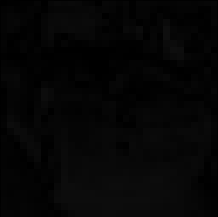

Orignial Image 6


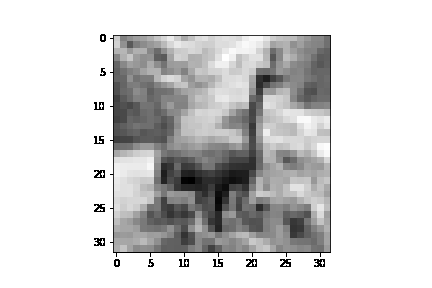

Converted Image 6


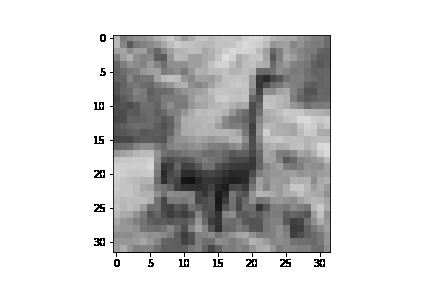

Difference in Images 6


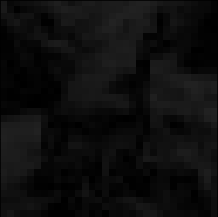

Orignial Image 7


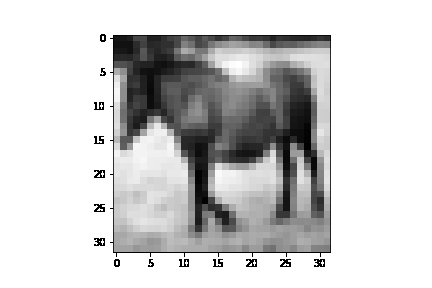

Converted Image 7


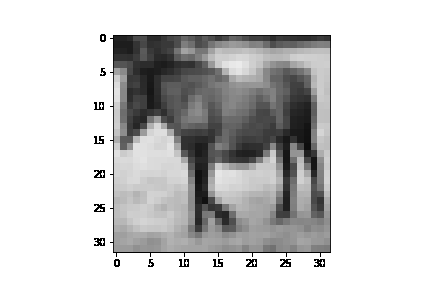

Difference in Images 7


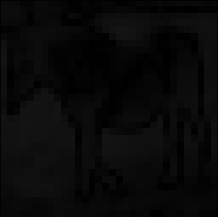

Orignial Image 8


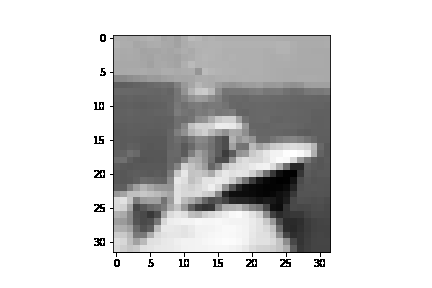

Converted Image 8


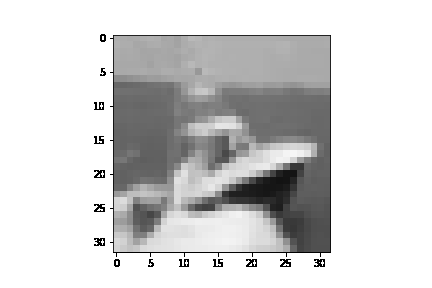

Difference in Images 8


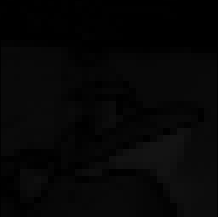

Orignial Image 9


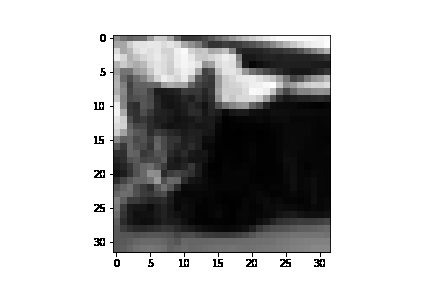

Converted Image 9


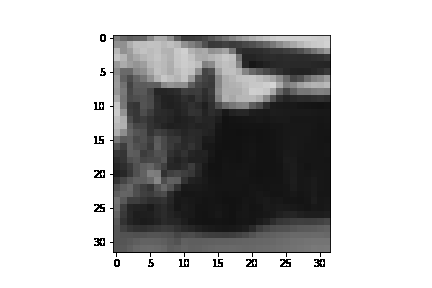

Difference in Images 9


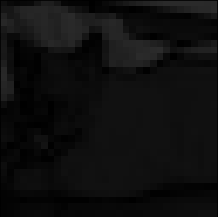

Orignial Image 10


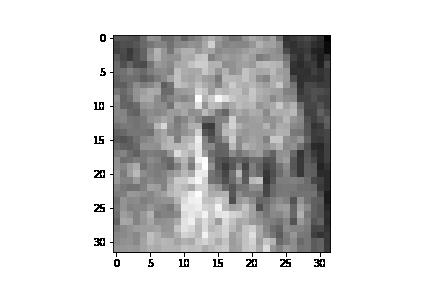

Converted Image 10


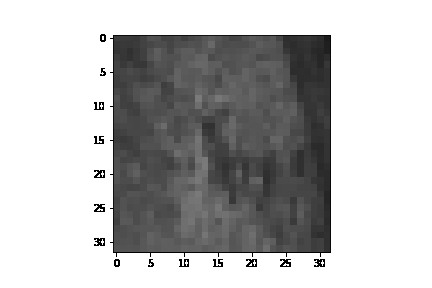

Difference in Images 10


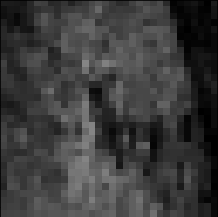

Orignial Image 11


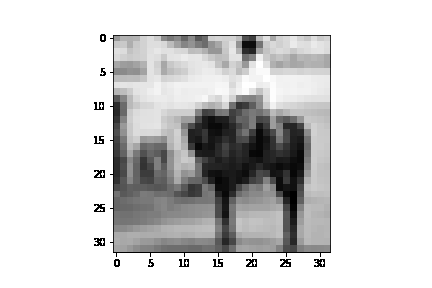

Converted Image 11


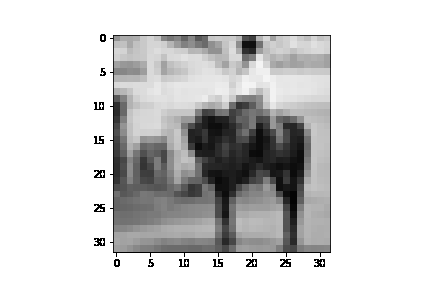

Difference in Images 11


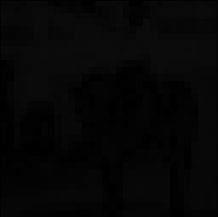

Orignial Image 12


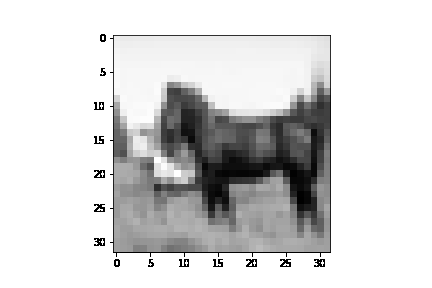

Converted Image 12


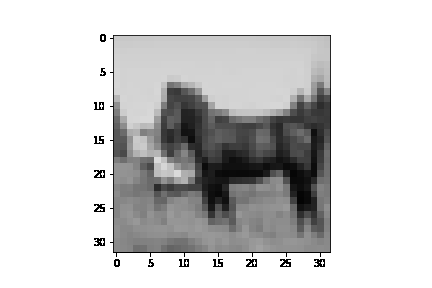

Difference in Images 12


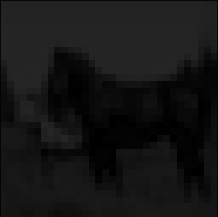

Orignial Image 13


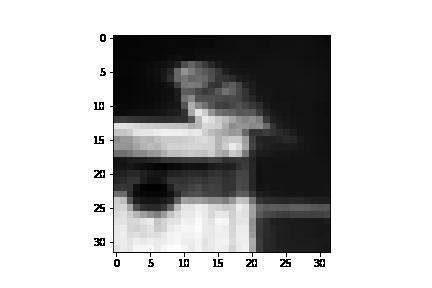

Converted Image 13


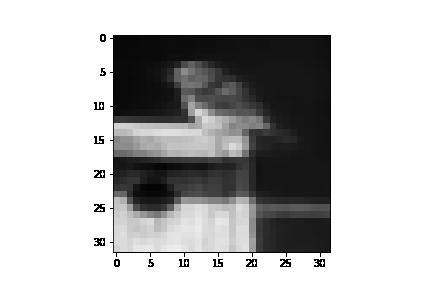

Difference in Images 13


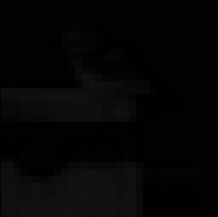

Orignial Image 14


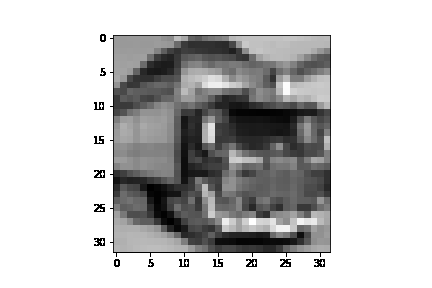

Converted Image 14


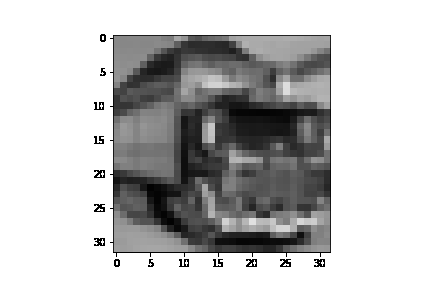

Difference in Images 14


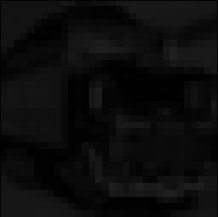

Orignial Image 15


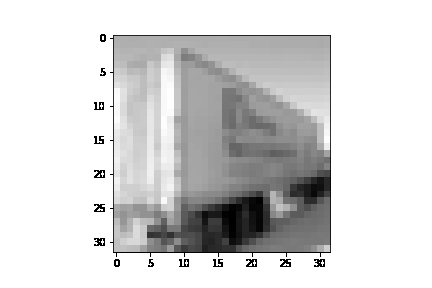

Converted Image 15


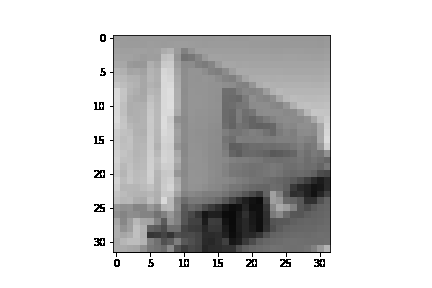

Difference in Images 15


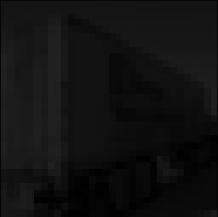

Orignial Image 16


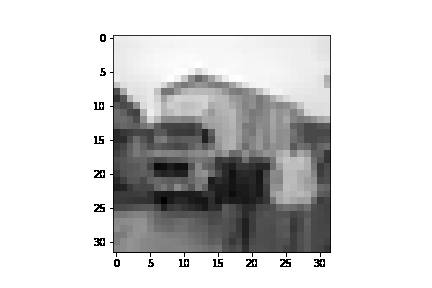

Converted Image 16


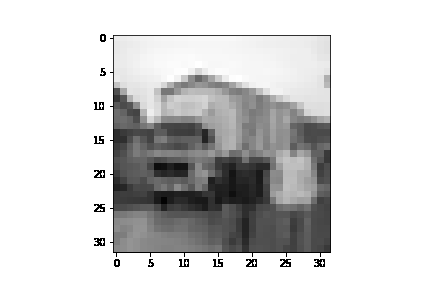

Difference in Images 16


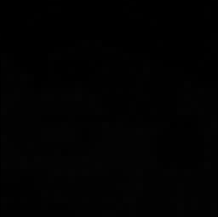

Orignial Image 17


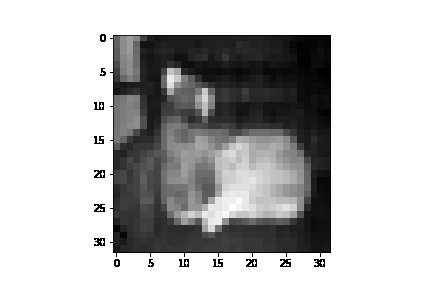

Converted Image 17


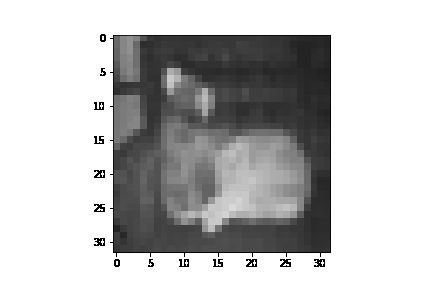

Difference in Images 17


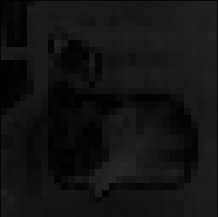

Orignial Image 18


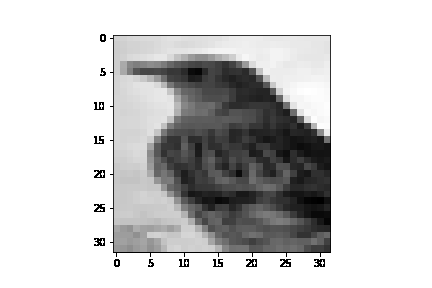

Converted Image 18


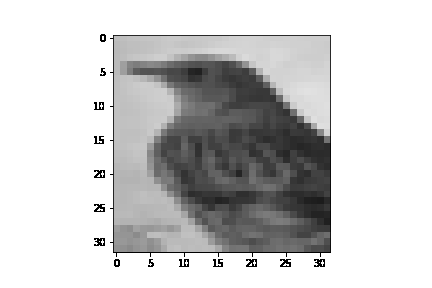

Difference in Images 18


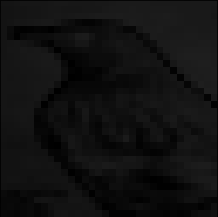

Orignial Image 19


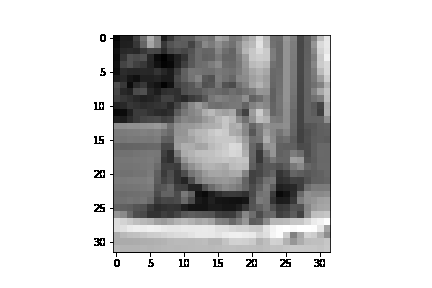

Converted Image 19


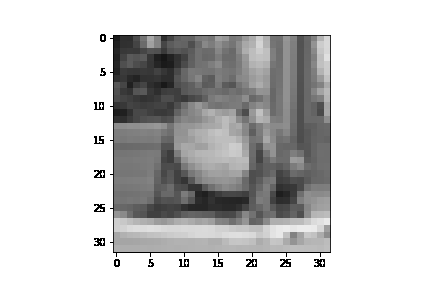

Difference in Images 19


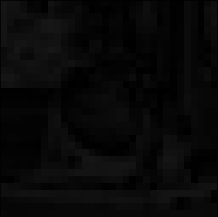

Orignial Image 20


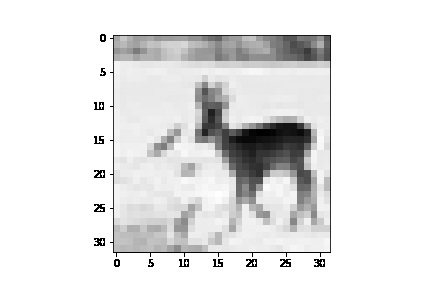

Converted Image 20


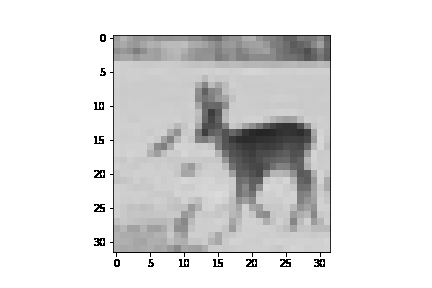

Difference in Images 20


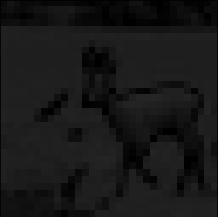

Orignial Image 21


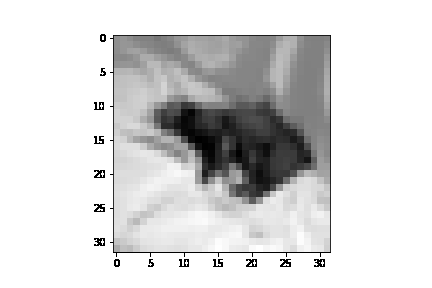

Converted Image 21


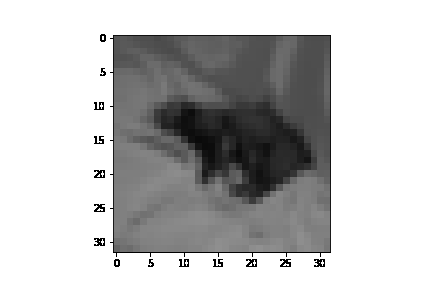

Difference in Images 21


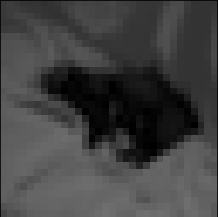

Orignial Image 22


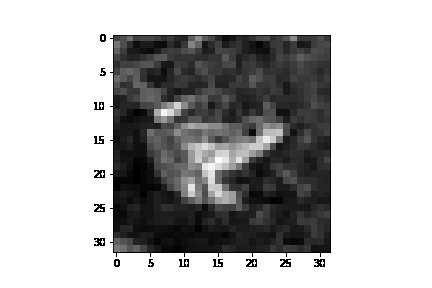

Converted Image 22


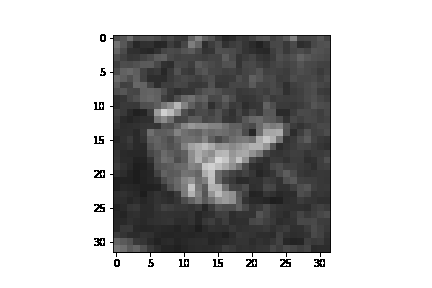

Difference in Images 22


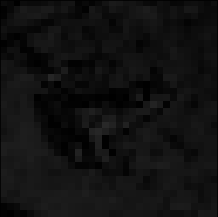

Orignial Image 23


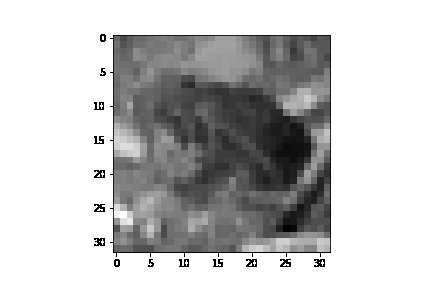

Converted Image 23


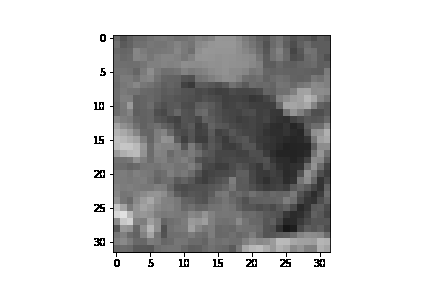

Difference in Images 23


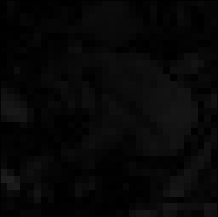

Orignial Image 24


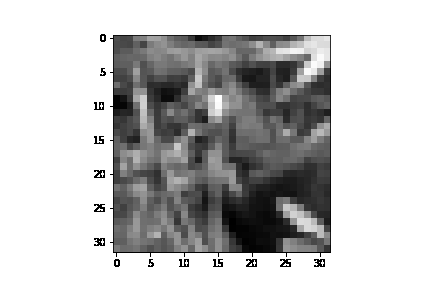

Converted Image 24


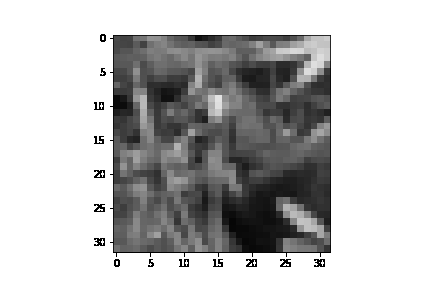

Difference in Images 24


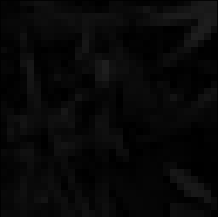

Orignial Image 25


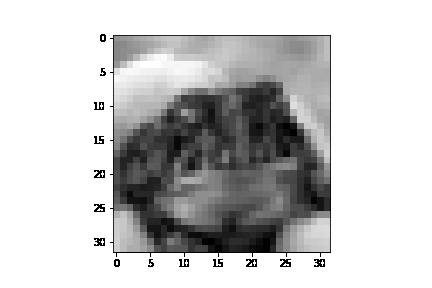

Converted Image 25


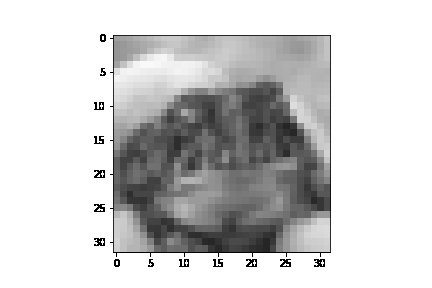

Difference in Images 25


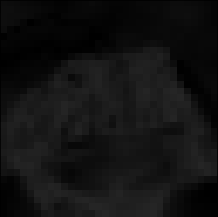

Orignial Image 26


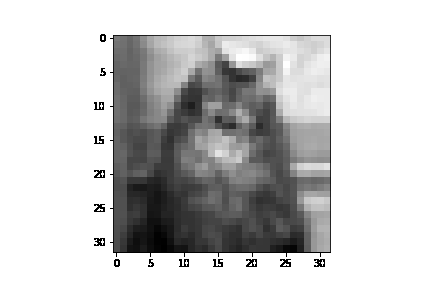

Converted Image 26


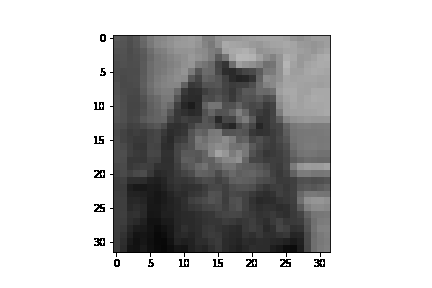

Difference in Images 26


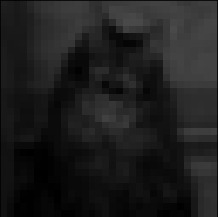

Orignial Image 27


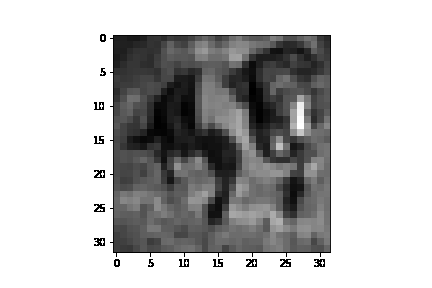

Converted Image 27


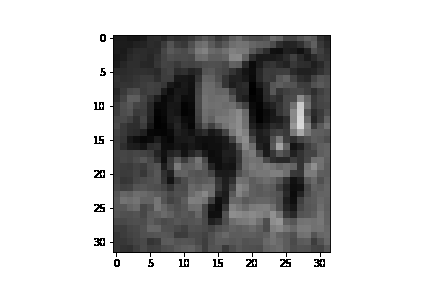

Difference in Images 27


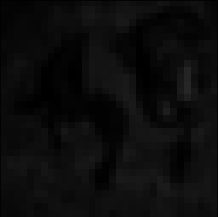

Orignial Image 28


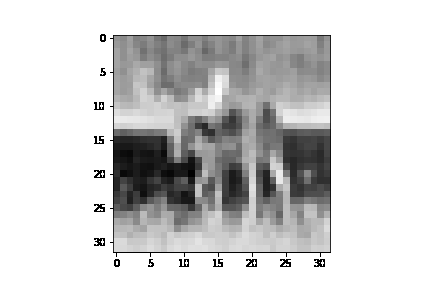

Converted Image 28


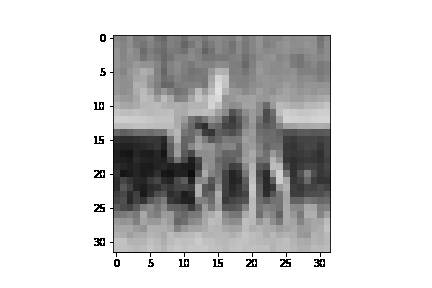

Difference in Images 28


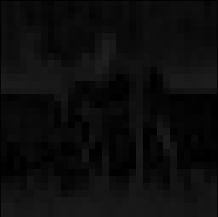

Orignial Image 29


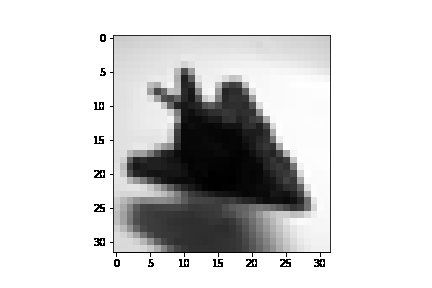

Converted Image 29


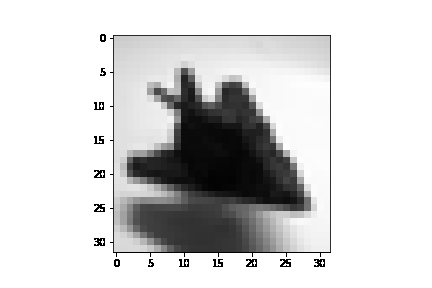

Difference in Images 29


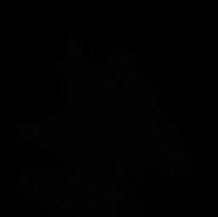

Orignial Image 30


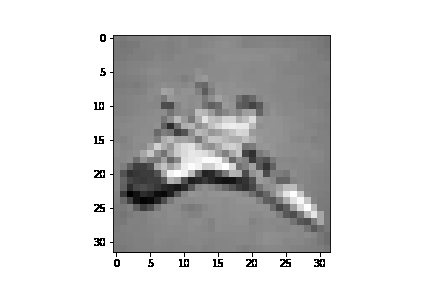

Converted Image 30


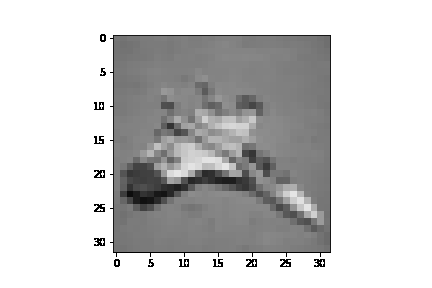

Difference in Images 30


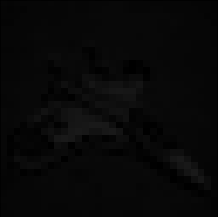

Orignial Image 31


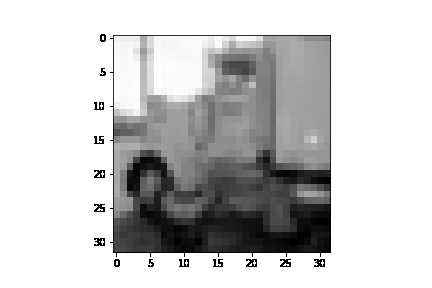

Converted Image 31


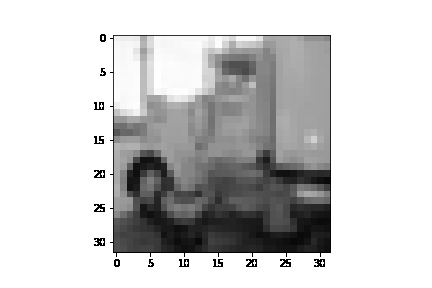

Difference in Images 31


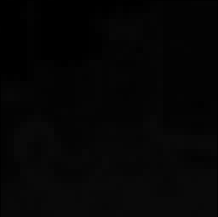

Orignial Image 32


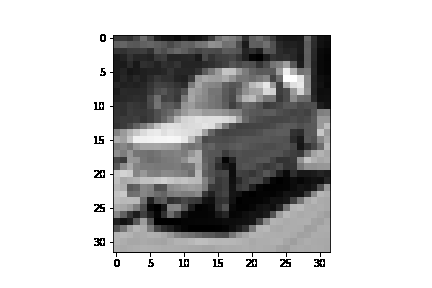

Converted Image 32


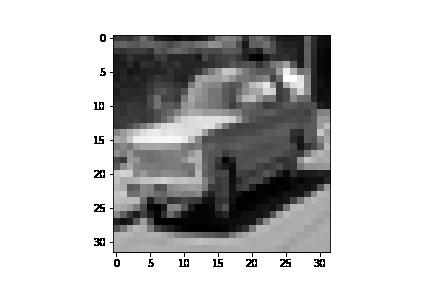

Difference in Images 32


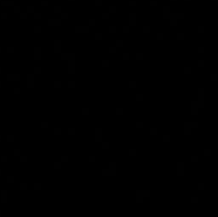

Orignial Image 33


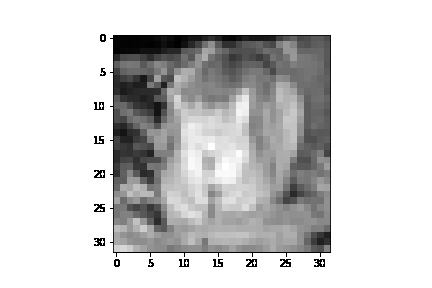

Converted Image 33


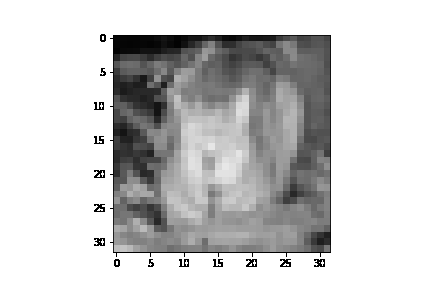

Difference in Images 33


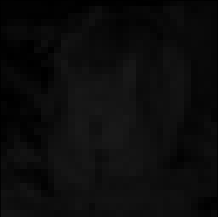

Orignial Image 34


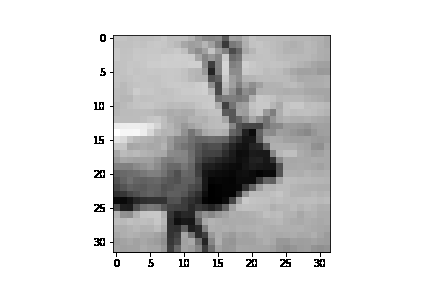

Converted Image 34


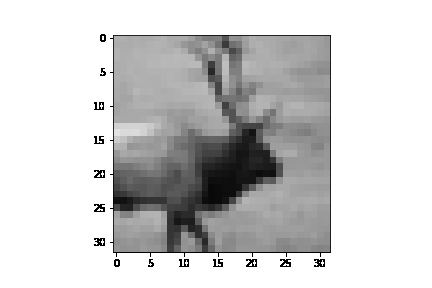

Difference in Images 34


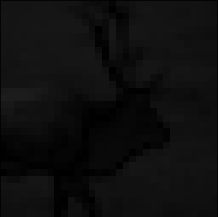

Orignial Image 35


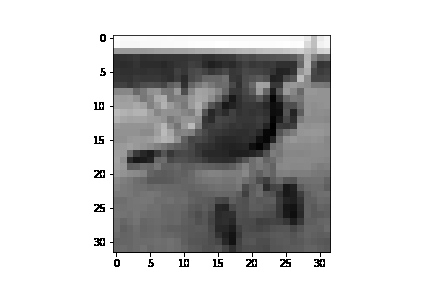

Converted Image 35


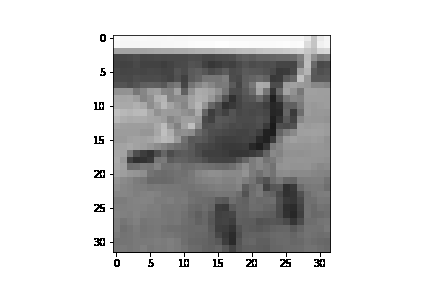

Difference in Images 35


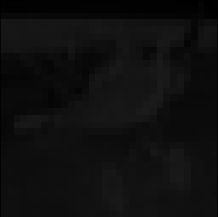

Orignial Image 36


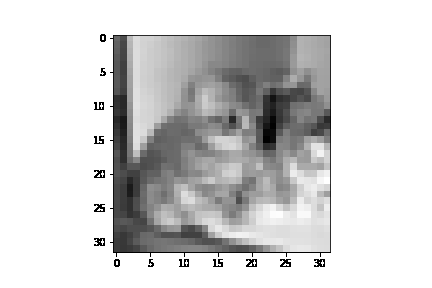

Converted Image 36


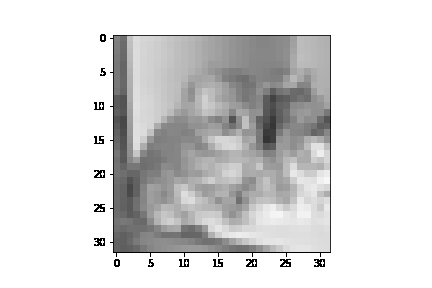

Difference in Images 36


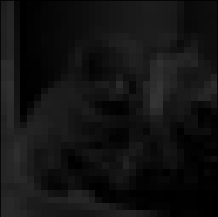

Orignial Image 37


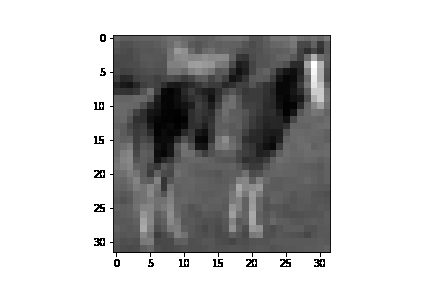

Converted Image 37


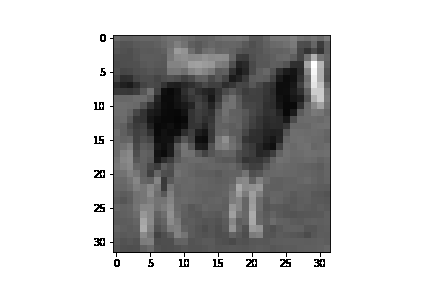

Difference in Images 37


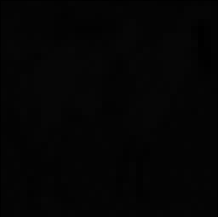

Orignial Image 38


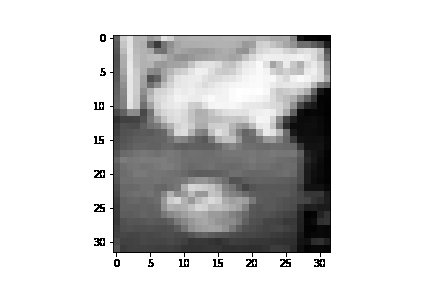

Converted Image 38


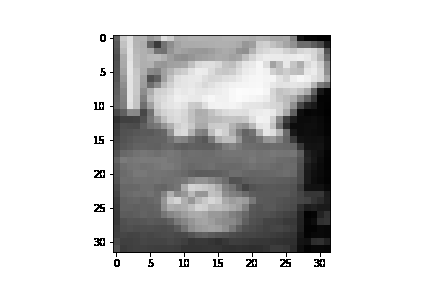

Difference in Images 38


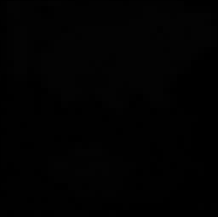

Orignial Image 39


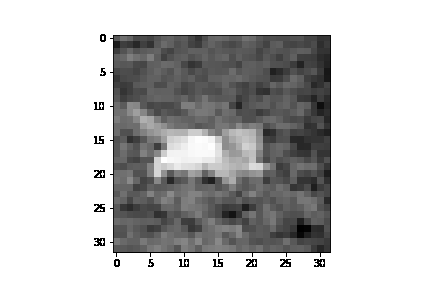

Converted Image 39


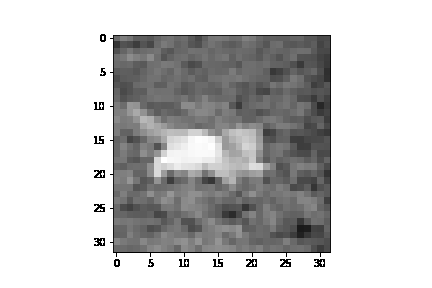

Difference in Images 39


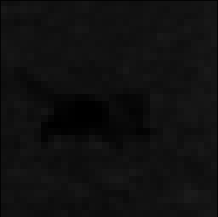

Orignial Image 40


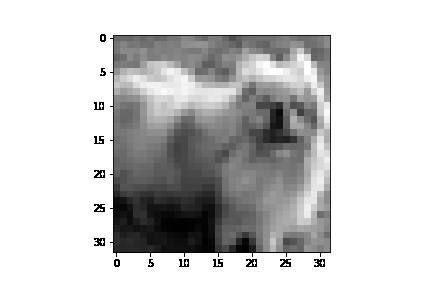

Converted Image 40


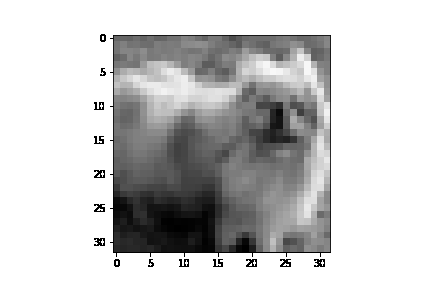

Difference in Images 40


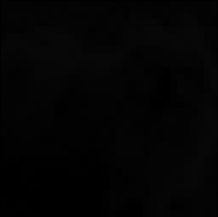

Orignial Image 41


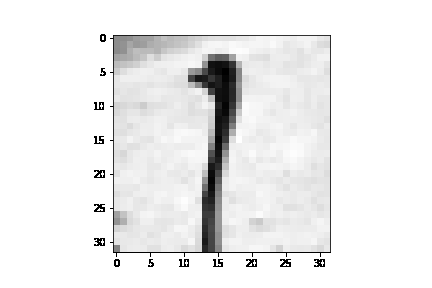

Converted Image 41


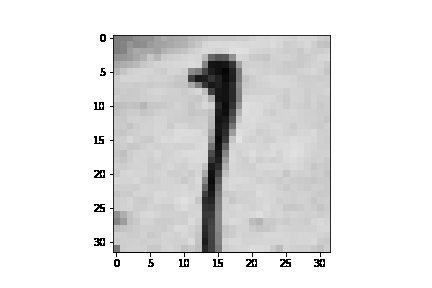

Difference in Images 41


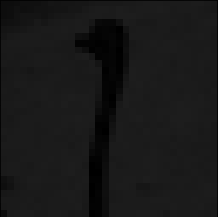

Orignial Image 42


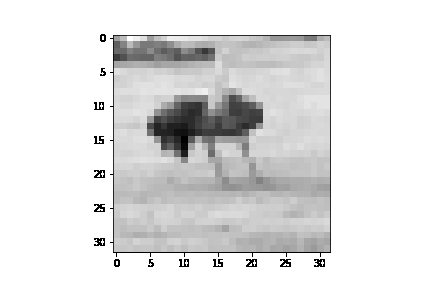

Converted Image 42


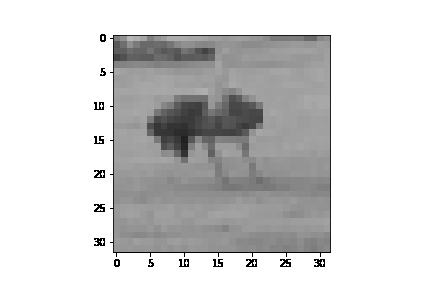

Difference in Images 42


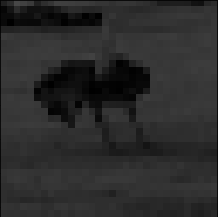

Orignial Image 43


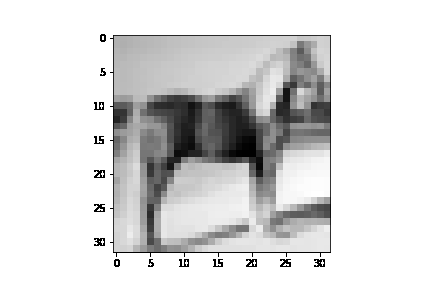

Converted Image 43


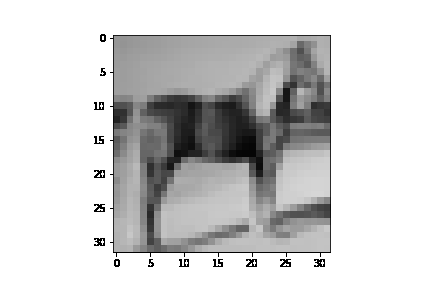

Difference in Images 43


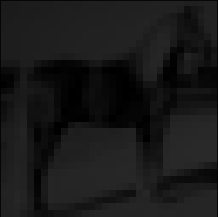

Orignial Image 44


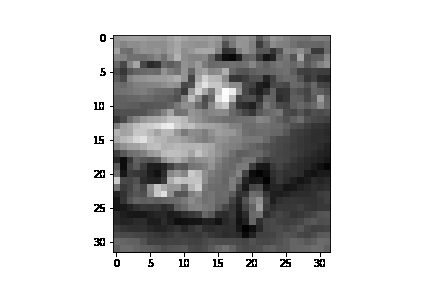

Converted Image 44


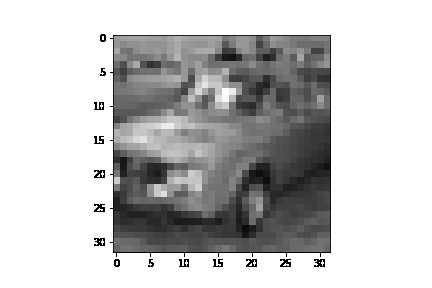

Difference in Images 44


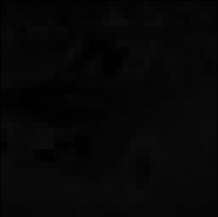

Orignial Image 45


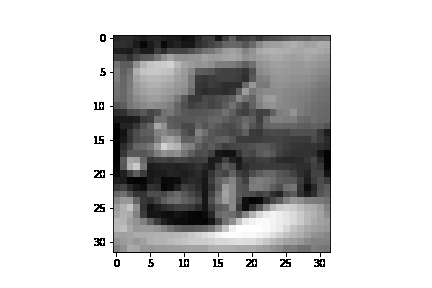

Converted Image 45


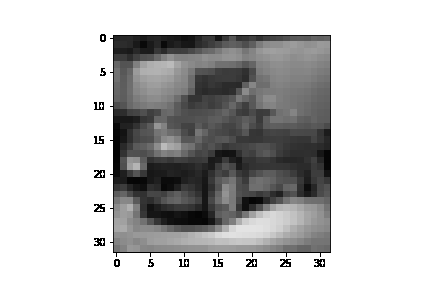

Difference in Images 45


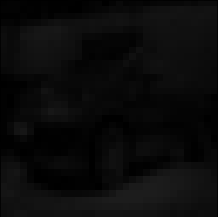

Orignial Image 46


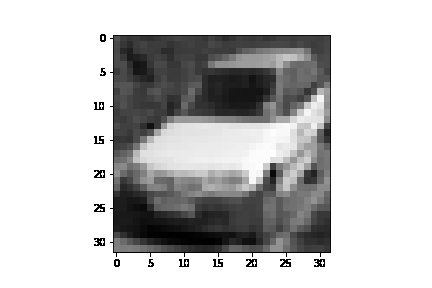

Converted Image 46


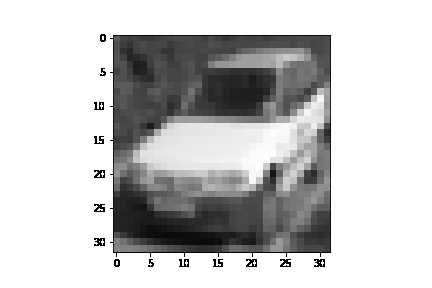

Difference in Images 46


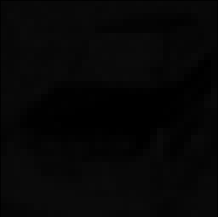

Orignial Image 47


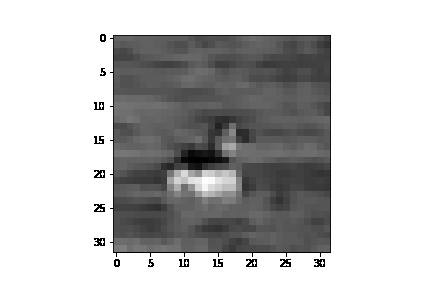

Converted Image 47


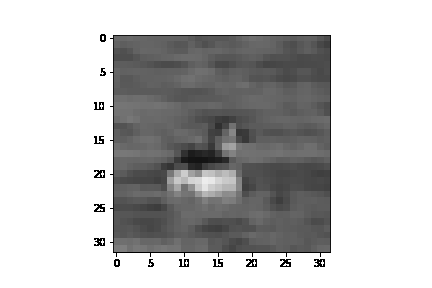

Difference in Images 47


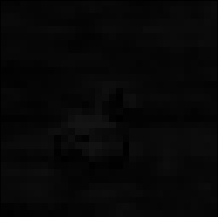

Orignial Image 48


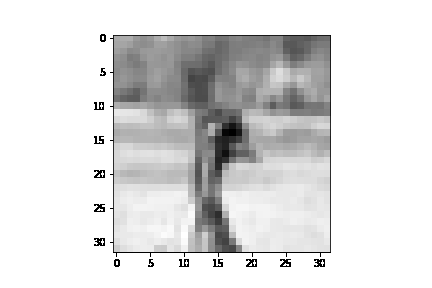

Converted Image 48


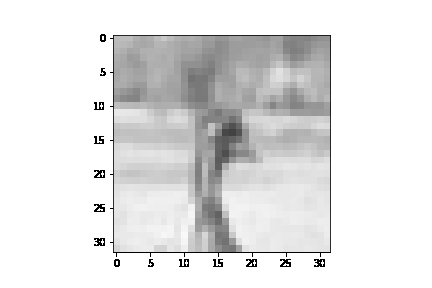

Difference in Images 48


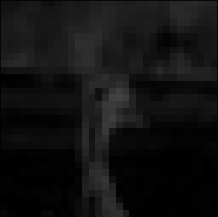

Orignial Image 49


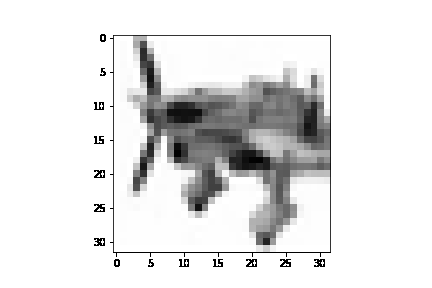

Converted Image 49


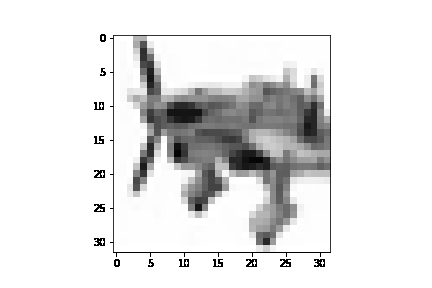

Difference in Images 49


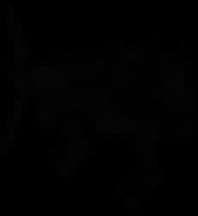

In [253]:
if not os.path.exists("cifar-10-grayscale-difference-first-50"):  #create directory, if directory does not exist
    os.makedirs('cifar-10-grayscale-difference-first-50')
    
for i in range(50):
    original_img = Image.open('cifar-10-grayscale-original-first-50/{0}.png'.format(i)) #read original grayscale image
    original_img=original_img.convert("L") 
    converted_img= Image.open('cifar-10-grayscale-converted-first-50/{0}.png'.format(i)) #read converted grayscale image
    diff = ImageChops.difference(original_img, converted_img) # compare images and get difference from images
    bbox=diff.getbbox()
    diff=diff.crop(bbox)
    diff.save("cifar-10-grayscale-difference-first-50/{}.png".format(i)) #save image
    print("Orignial Image {}".format(i))
    display(original_img) #display original grayscale image
    print("Converted Image {}".format(i))
    display(converted_img) #display converted grayscale image
    print("Difference in Images {}".format(i))
    display(diff) #display difference in images
    print("==========================================")

For images with differences, display the difference in images

Image 2


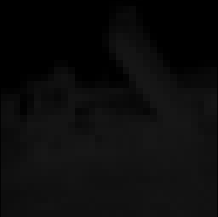

Image 3


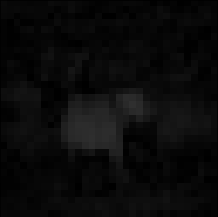

Image 6


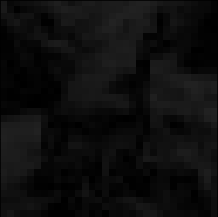

Image 7


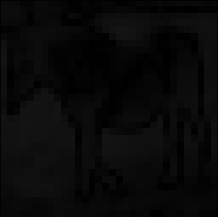

Image 8


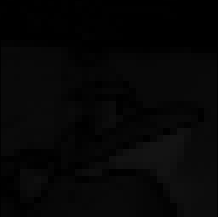

Image 9


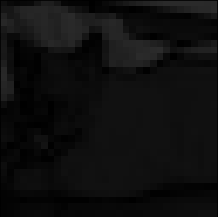

Image 10


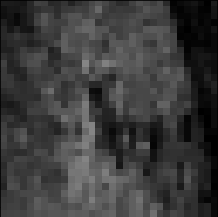

Image 12


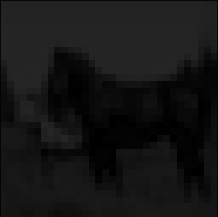

Image 13


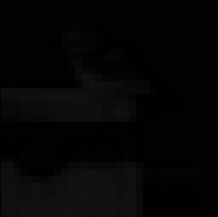

Image 14


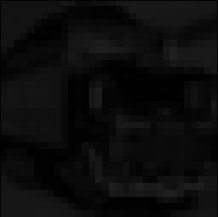

Image 15


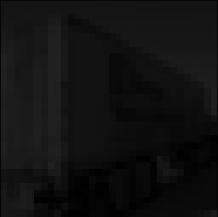

Image 17


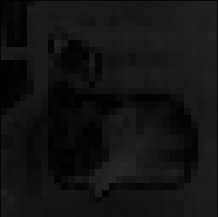

Image 18


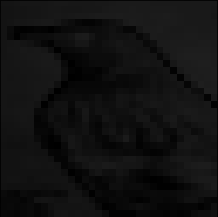

Image 19


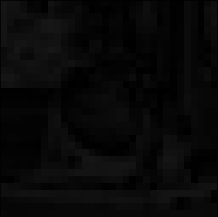

Image 20


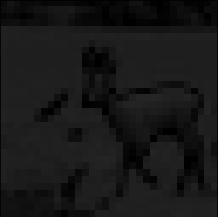

Image 21


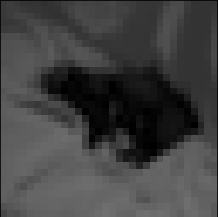

Image 22


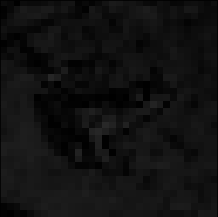

Image 23


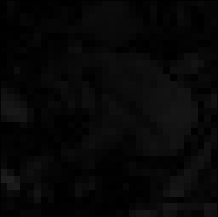

Image 24


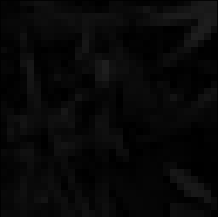

Image 25


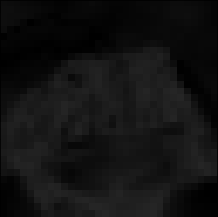

Image 26


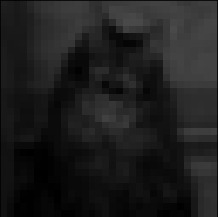

Image 27


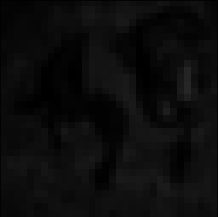

Image 28


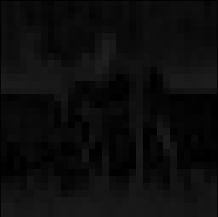

Image 30


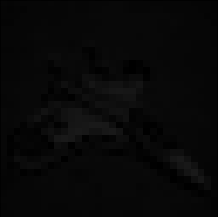

Image 33


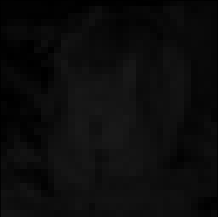

Image 34


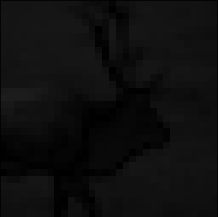

Image 35


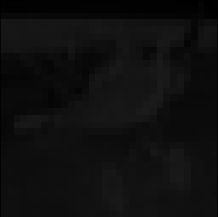

Image 36


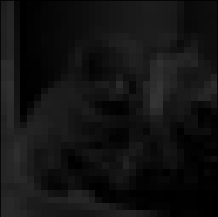

Image 39


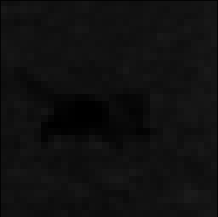

Image 41


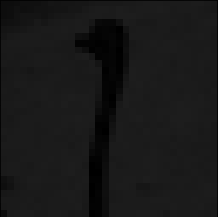

Image 42


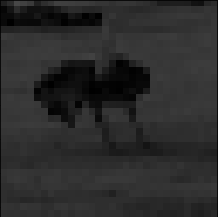

Image 43


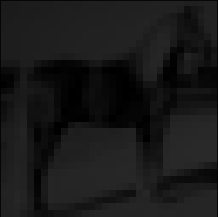

Image 45


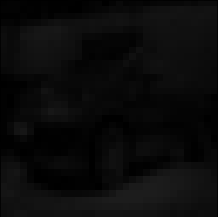

Image 47


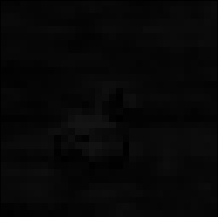

Image 48


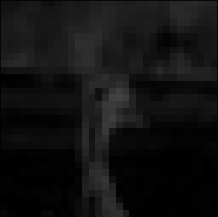

In [259]:
difference_list = [2,3,6,7,8,9,10,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,30,33,34,35,36,39,41,42,43,45,47,48] 
for i in difference_list:
    difference_img = Image.open('cifar-10-grayscale-difference-first-50/{0}.png'.format(i))
    print("Image {}".format(i))
    display(difference_img)

For images with little/no differences, display the difference in images

Image 0


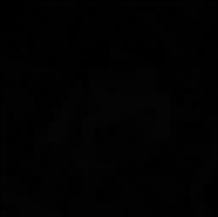

Image 1


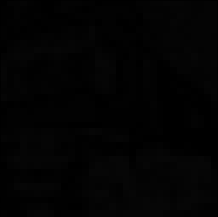

Image 4


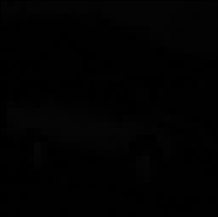

Image 5


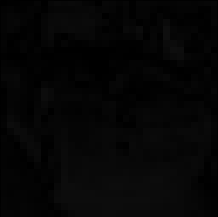

Image 11


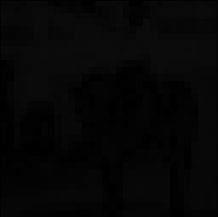

Image 16


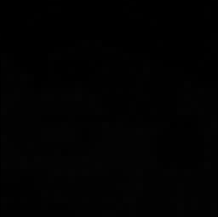

Image 29


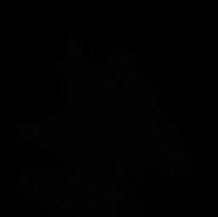

Image 31


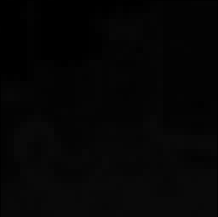

Image 32


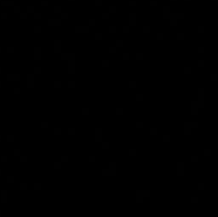

Image 37


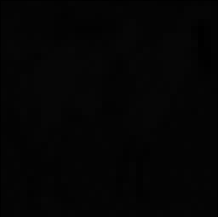

Image 38


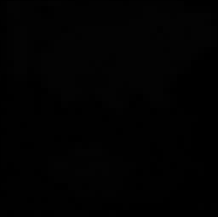

Image 40


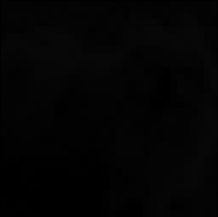

Image 44


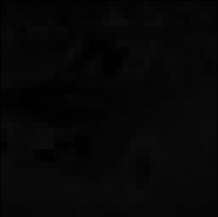

Image 46


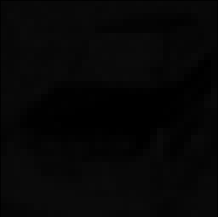

Image 49


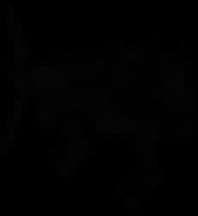

In [260]:
for i in range(50):
    if i not in difference_list:
        difference_img = Image.open('cifar-10-grayscale-difference-first-50/{0}.png'.format(i))
        print("Image {}".format(i))
        display(difference_img)

The following converted images were different from the original images: <br>
2,3,6,7,8,9,10,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,30,33,34,35,36,39,41,42,43,45,47,48

The following converted images had only small/no differences from the original images <br>
0,1,4,5,11,31,32,44,,46,49

The images with small/no differences are mostly entirely black. However, for images with significant differences, we can clearly see the differences in the the pixel intensity